# Bank Marketing Campaign - Classification

In this task we will explore the dataset of Bank Marketing Campaign. The classification goal is to predict if the client will subscribe (yes/no). We will use Machine Learning algorithms to solve this problem.

Dataset comes from the UCI Machine Learning repository [LINK](https://archive.ics.uci.edu/ml/datasets/bank+marketing)


# Table of Contents

1. [Basic dataset description](#ch1)  
2. [Quick-and-dirty model](#ch2)  
3. [Machine Learning - algorithm casting](#ch3)  
3.1. [Gaussian Naive Bayes](#ch31)  
3.2. [Logistic Regression](#ch32)  
3.3. [Random Forest Classifier](#ch33)  
3.4. [XGBoost Classifier](#ch34)  
3.5. [Gradient Boosting Classifier](#ch35)  
3.6. [Algorithms performance schedule](#ch36)  
3.7. [Machine Learning Algorithms - Summary](#ch37)  
4. [Reducing number of features](#ch4)  
4.1. [Recursive Feature Elimination (RFE)](#ch41)  
4.1.1. [RFE for Random Forest Classifier](#ch411)  
4.1.2. [RFE for Gradient Boosting Classifier](#ch412)  
4.1.3. [RFE - Summary](#ch413)  
4.2. [Dimensionality reduction with Principal Component Analysis (PCA)](#ch42)  
4.2.1. [PCA + Logistic Regression](#ch421)  
4.2.2. [PCA + Random Forest Classifier](#ch422)  
4.2.3. [PCA + Support Vector Classifier](#ch423)  
4.2.4. [PCA - Summary](#ch424)  
5. [The influence of made by hand feature engineering (FE)](#ch5)  
5.1. [Influence of FE for Logistic Regression](#ch51)  
5.2. [Influence of FE for Random Forest Classifier](#ch52)  
5.3. [Influence of FE for Gradient Boosting Classifier](#ch53)  
5.4. [Influence of FE - Summary](#ch54)  
6. [Conclusions](#ch6)  
6.1 [Further opportunities](#ch61)  

<a id="ch1"></a>

# 1. Basic dataset description

In [1]:
with open('bank/bank-names.txt') as f:
    print(f.read())

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European S

In [2]:
column_description = {
    'age' : 'Age of customer',
    'job' : 'Type of job',
    'marital' : 'Marital status',
    'education' : 'Education level',
    'default' : 'Has credit in default?',
    'balance' : 'Average yearly balance, in euros',
    'housing' : 'Has housing loan?',
    'loan' : 'Has personal loan?',
    'contact' : 'Contact communication type',
    'day' : 'Last contact day of the month',
    'month' : 'Last contact month of year',
    'duration' : 'Last contact duration, in seconds',
    'campaign' : 'Number of contacts performed during this campaign and for this client',
    'pdays' : 'Number of days that passed by after the client was last contacted from a previous campaign',
    'previous' : 'Number of contacts performed before this campaign and for this client',
    'poutcome' : 'Outcome of the previous marketing campaign',
    'y' : 'has the client subscribed a term deposit?'
}

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
sns.set()

In [4]:
data = pd.read_csv('bank/bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Let's check if there are any "NaN" instances in our dataset

In [5]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

We will prepare summary plots for every numerical and categorical feature to show the relationship with the target label 'y'. This will gain us some intuition about features.

In [6]:
cat_cols = [data.columns[i] for i in range(len(data.dtypes)) if data.dtypes[i].kind == 'O']
num_cols = [data.columns[i] for i in range(len(data.dtypes)) if data.dtypes[i].kind != 'O']

print('Categorical columns: {}'.format(cat_cols))
print('Numerical columns: {}'.format(num_cols))

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [7]:
def categorical_summarize_plots(category):
    fig, ax = plt.subplots(1,2,figsize = (14,5), gridspec_kw=dict(hspace = 0.3), sharex=True)
    g1 = sns.countplot(x = category, data = data, ax = ax[0])
    g1.set_xticklabels(g1.get_xticklabels(), rotation = 80);
    g1.set_title('Histogram of {}'.format(category.capitalize()), size = 12)
    g1.set_ylabel('Frequency')
    g1.set_xlabel(category.capitalize())

    table=pd.crosstab(data[category],data.y)
    g2 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax = ax[1])
    g2.set_xticklabels(g2.get_xticklabels(), rotation = 80, size = 12);
    g2.set_title('Stacked Bar Chart of {} vs Purchase'.format(category.capitalize()), size = 12)
    g2.set_ylabel('Proportion of customers')
    g2.set_xlabel(category.capitalize())
    g2.legend(loc = 'lower left', title = 'Subscription')
    
    plt.suptitle('{} = {}'.format(category.capitalize(), column_description[category]), size = 15)

First we will summarize categorical features. On the left side we will present a Histogram to see the frequency of the feature values. On the right side we show Stacked Bar Chart to show the proportion of Subscritions for the partticular feature value.

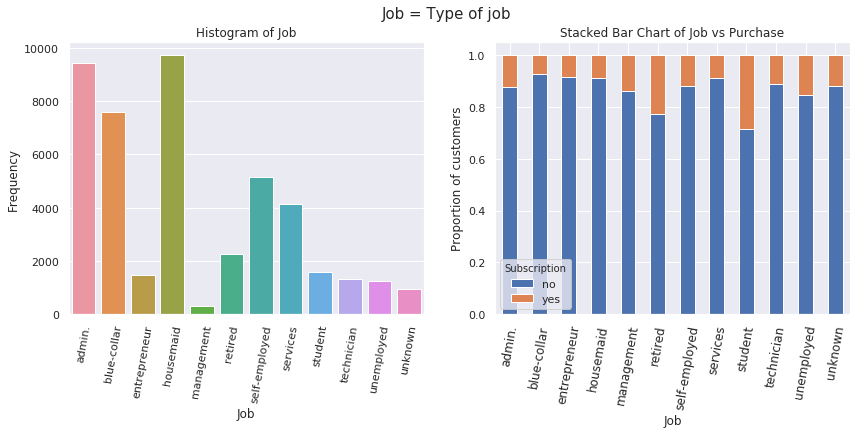

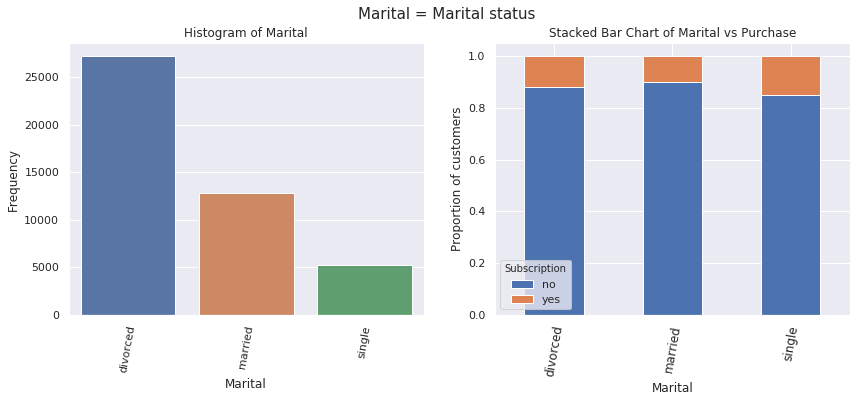

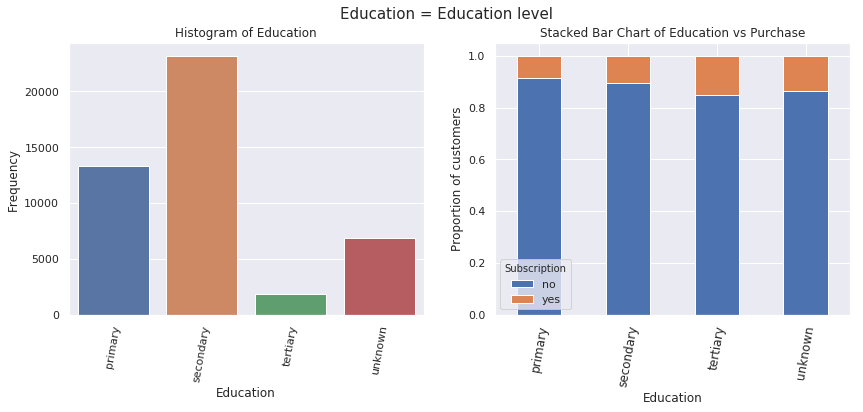

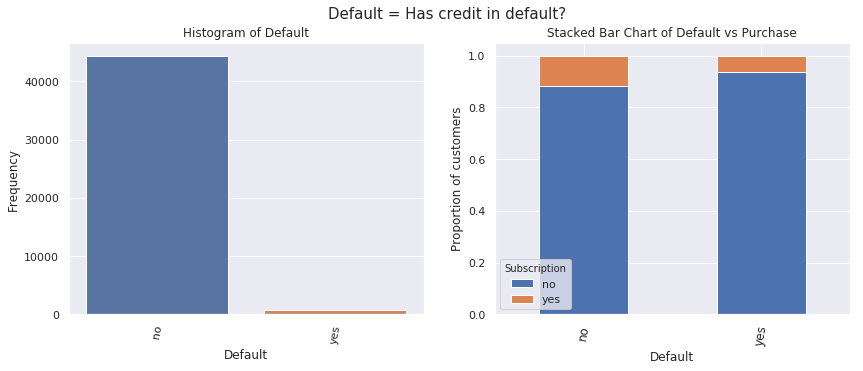

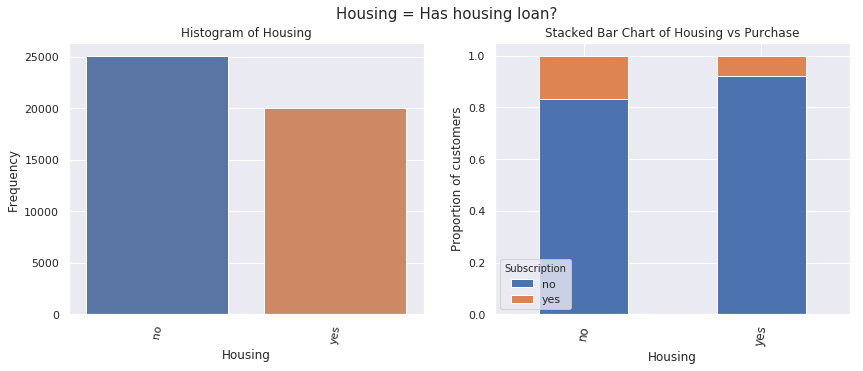

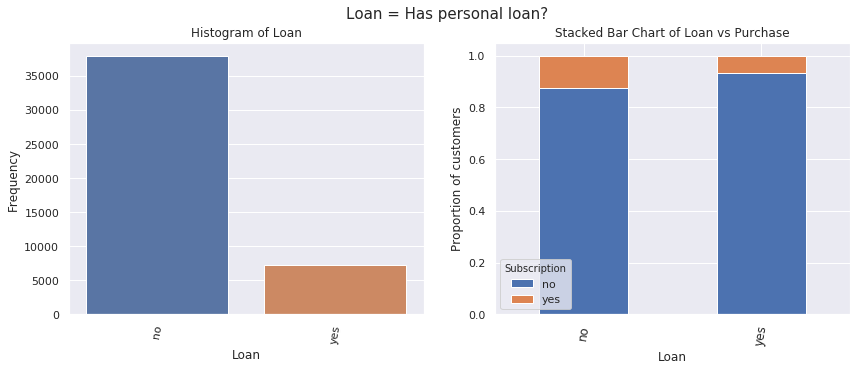

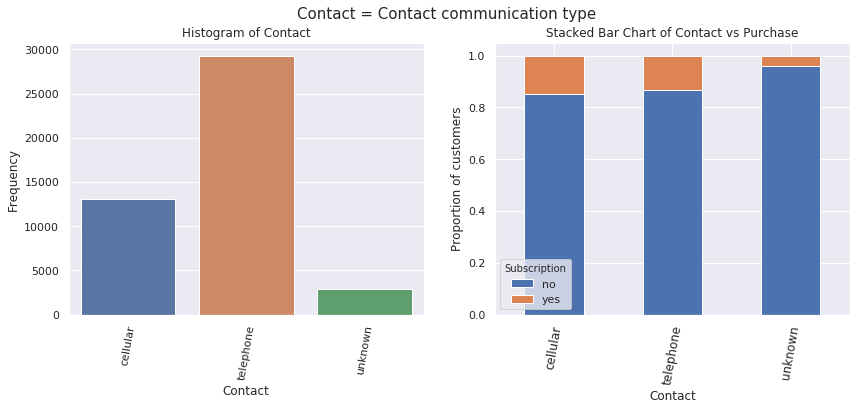

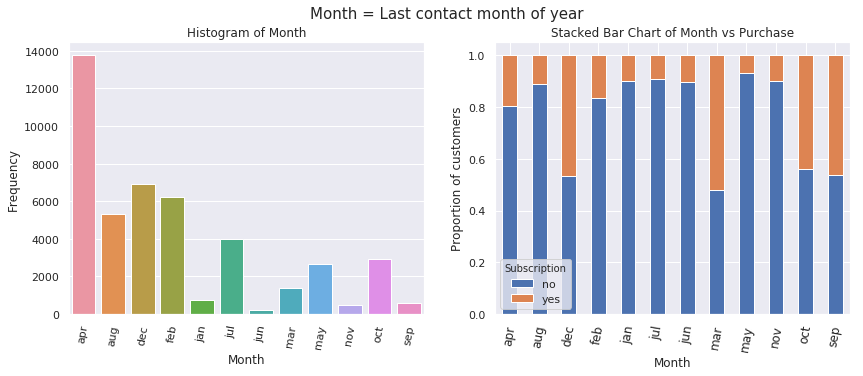

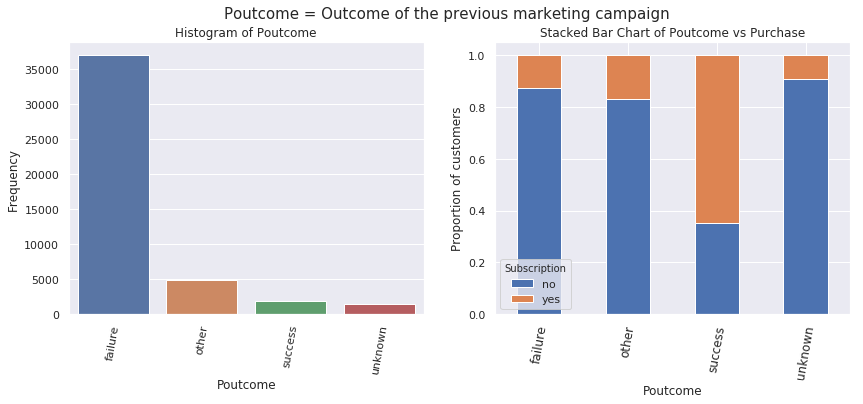

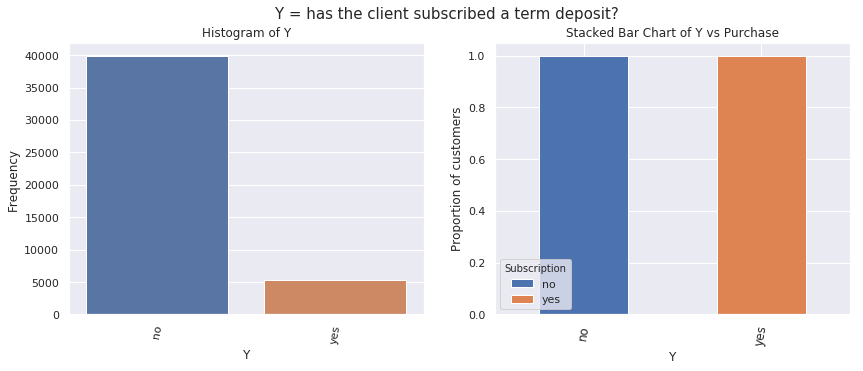

In [8]:
for i in range(len(cat_cols)):
    categorical_summarize_plots(cat_cols[i])

In [9]:
def numerical_summarize_plots(category, x_lim = False, y_lim_1 = False, y_lim_2 = False, gridsize = 100):
    fig, ax = plt.subplots(1,2,figsize = (14,5), gridspec_kw=dict(hspace = 0.3), sharex=True)
    
    g1 = pd.crosstab(data[category], data.y).plot(ax = ax[0])
    g1.set_title('Line Chart of {} vs Purchase'.format(category.capitalize()), size = 12)
    g1.set_ylabel('Frequency of customers')
    g1.set_xlabel(category.capitalize())
    g1.legend(loc = 'upper right', title = 'Subscription')
    
    g2 = sns.kdeplot(data.query('y == "yes"')[category], label = 'yes', ax = ax[1], gridsize=gridsize)
    sns.kdeplot(data.query('y == "no"')[category], label = 'no', ax = g2, gridsize=gridsize)
    g2.set_title('KDE Plot of {} vs Purchase'.format(category.capitalize()), size = 12)
    g2.set_ylabel('Proportion of customers')
    g2.set_xlabel(category.capitalize())
    g2.legend(loc = 'upper right', title = 'Subscription')

    if x_lim:
        g1.set_xlim(x_lim)
    if y_lim_1:
        g1.set_ylim(y_lim_1)
    if y_lim_2:
        g2.set_ylim(y_lim_2)
    
    plt.suptitle('{} = {}'.format(category.capitalize(), column_description[category]), size = 15)

Now it would be nice to get some intuition about numerical features. On the left side we will present a Line Chart to see pure frequency of the feature values. 

On the right side we show the KDE plot to check the distribution of Subscriptions in the examinated feature. This show the distribution of the particular response (lines for 'Yes'/'No' are drawn independently).

Sometimes we will plot more than one plot per category to zoom the most interesting parts of the figure.

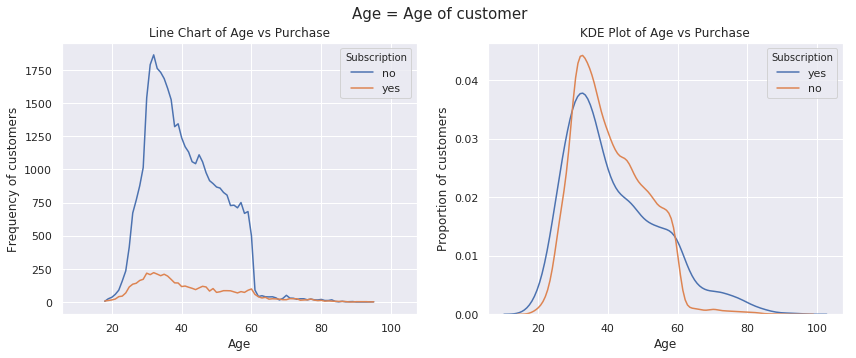

In [10]:
numerical_summarize_plots(num_cols[0])

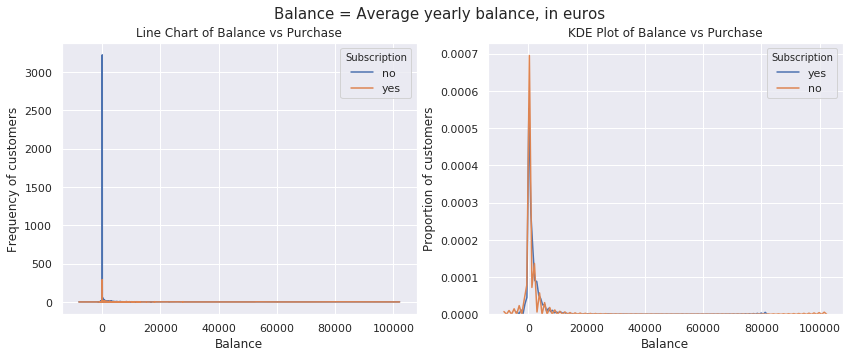

In [11]:
numerical_summarize_plots(num_cols[1])

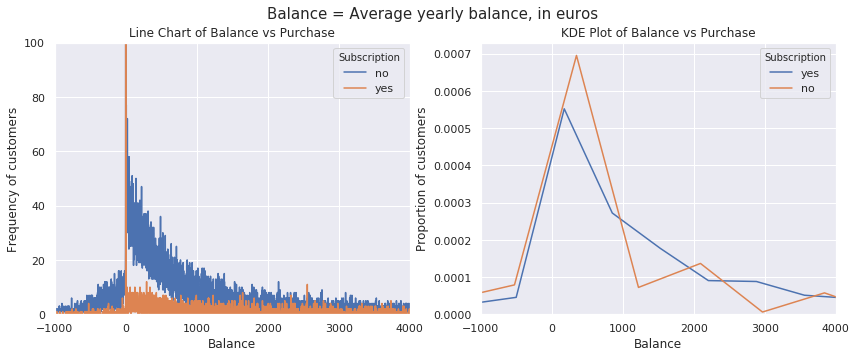

In [12]:
numerical_summarize_plots(num_cols[1], x_lim=(-1000, 4000), y_lim_1=(0, 100))

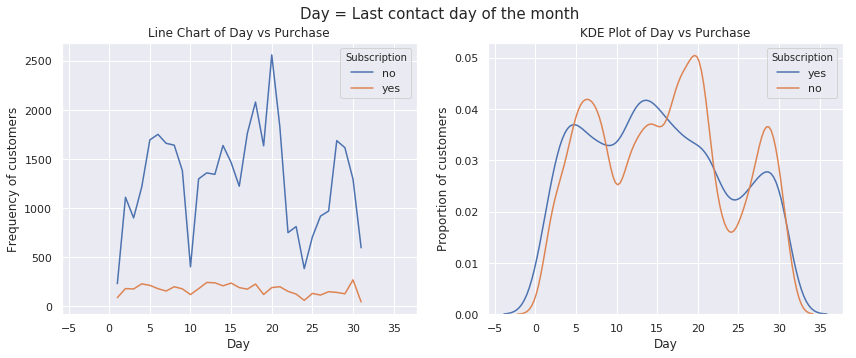

In [13]:
numerical_summarize_plots(num_cols[2])

Sometimes KDA plots (which are some kind of apprioximations) contains slight information noise inconsistent with human intuition. Of course there are no number of days in the month less than 0 and greater than 31. We can easy realize this looking at the plot on the left side. These mainpulations help to keep the lines smooth enough to interpretate.

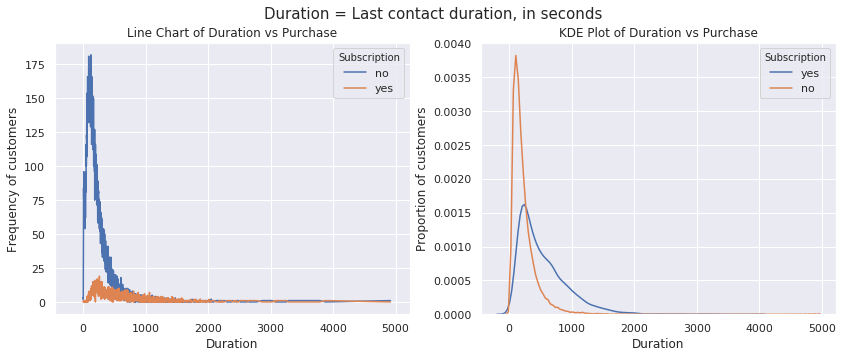

In [14]:
numerical_summarize_plots(num_cols[3])

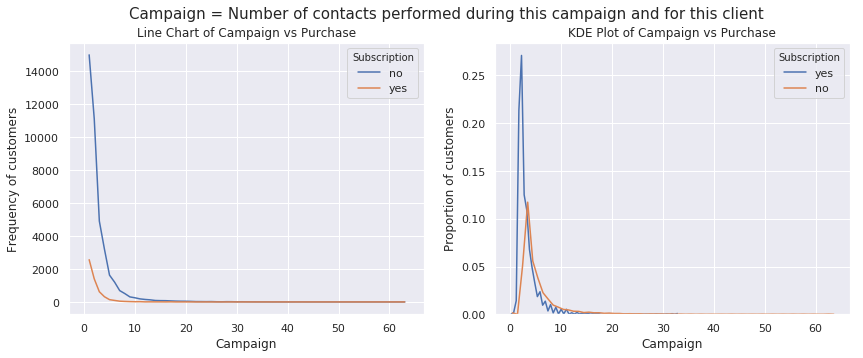

In [15]:
numerical_summarize_plots(num_cols[4], gridsize=50)

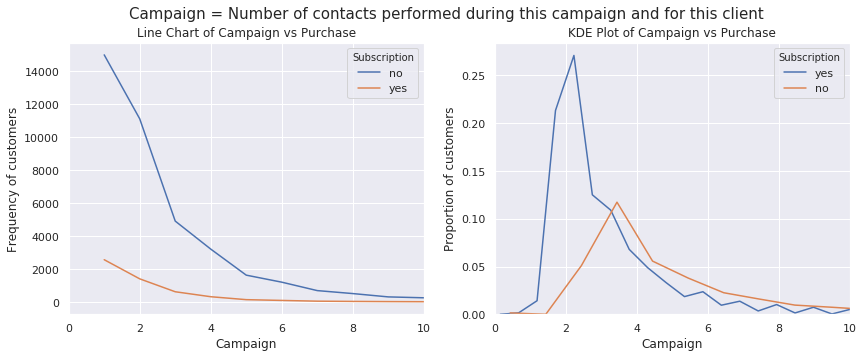

In [16]:
numerical_summarize_plots(num_cols[4], x_lim=(0, 10), gridsize=50)

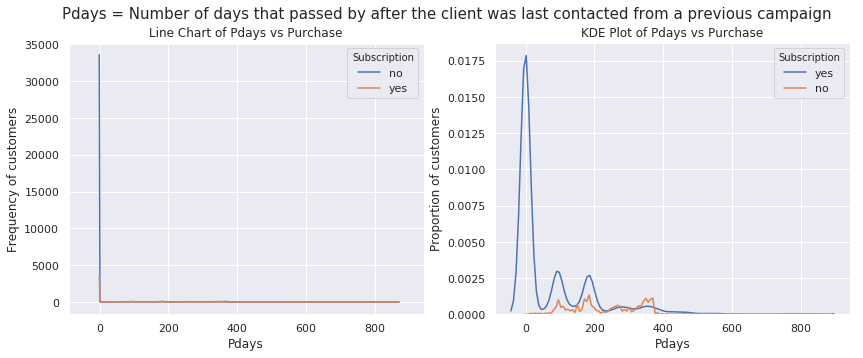

In [17]:
numerical_summarize_plots(num_cols[5])

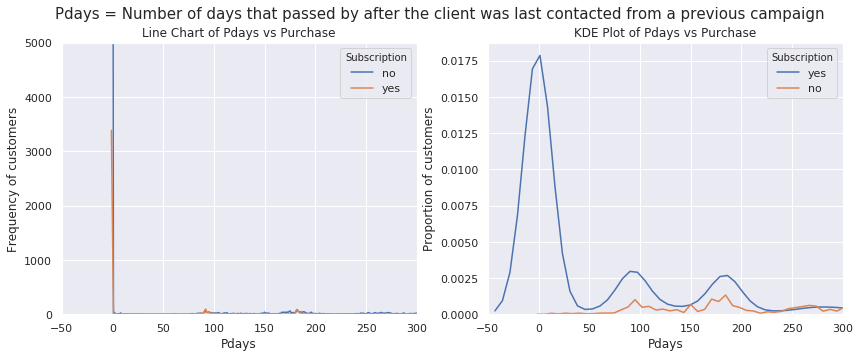

In [18]:
numerical_summarize_plots(num_cols[5], x_lim=(-50, 300), y_lim_1=(0,5000))
#-1 value may be considered in a different way

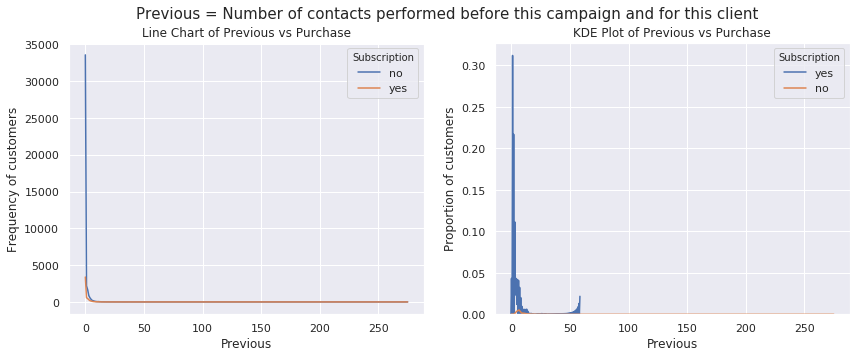

In [19]:
numerical_summarize_plots(num_cols[6])

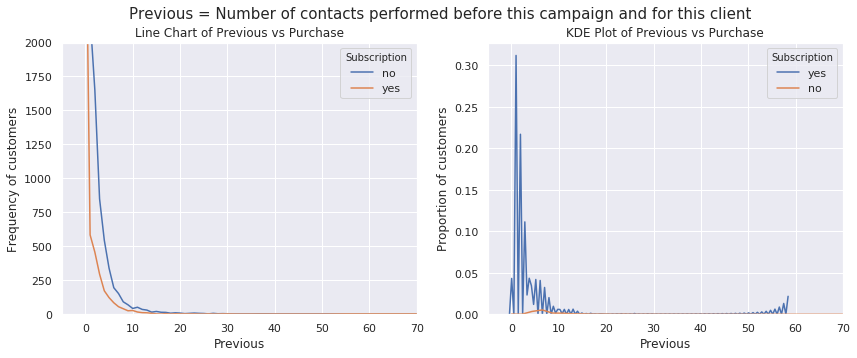

In [20]:
numerical_summarize_plots(num_cols[6], x_lim=(-5,70), y_lim_1=(-2, 2000))
#0 value may be considered in a different way

In [21]:
for category in num_cols:
    df = pd.DataFrame(data[category].value_counts())
    df = df.assign(Percentage = df.iloc[:,0]/len(data)*100)
    print("Top 5 most frequent values in '{}' category: ".format(category.capitalize()))
    print(df.head())
    print()

Top 5 most frequent values in 'Age' category: 
     age  Percentage
32  2085    4.611710
31  1996    4.414855
33  1972    4.361770
34  1930    4.268873
35  1894    4.189246

Top 5 most frequent values in 'Balance' category: 
   balance  Percentage
0     3514    7.772445
1      195    0.431311
2      156    0.345049
4      139    0.307447
3      134    0.296388

Top 5 most frequent values in 'Day' category: 
     day  Percentage
20  2752    6.087014
18  2308    5.104952
21  2026    4.481210
17  1939    4.288779
6   1932    4.273296

Top 5 most frequent values in 'Duration' category: 
     duration  Percentage
124       188    0.415828
90        184    0.406981
89        177    0.391498
122       175    0.387074
104       175    0.387074

Top 5 most frequent values in 'Campaign' category: 
   campaign  Percentage
1     17544   38.804716
2     12505   27.659198
3      5521   12.211630
4      3522    7.790140
5      1764    3.901705

Top 5 most frequent values in 'Pdays' category: 
      p


Converting 'previous'=0 and 'pdays' = -1 into categorical variables seems to be very promising avenue to check later in the feature engineering part. 'Balance' = 0 is worth to consider as well but this may be or may be not a good idea.

<a id="ch2"></a>
# 2. Quick-and-dirty model


First we will run a simple model to have some reference point for our further consideration. Naive Bayes will be our prototype.

In [22]:
y = (data['y'] == 'yes').astype('int')
X = data.drop('y', axis=1)
cat_cols.remove('y')

In [23]:
# it is convenient to keep all the machine learning imports in one place when you restart kernel sometimes

from time import time

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.feature_selection import RFE

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import RandomOverSampler

from xgboost import XGBClassifier

In [24]:
X[num_cols] = X[num_cols].astype('float') # we need float to silence StandardScaler warnings
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
kf = KFold(n_splits=5, shuffle=True, random_state = 0)

num_steps = ('ss', StandardScaler(), num_cols)
cat_steps = ('ohe', OneHotEncoder(sparse=False), cat_cols)
ct = ColumnTransformer(transformers=[cat_steps, num_steps])

model = imbPipeline([('ct', ct),
                       ('ros', RandomOverSampler(random_state=0)), 
                       ('est', GaussianNB())])
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_predicted_proba = model.predict_proba(X_test)

In [25]:
print('Model Score = : {:0.3f}'.format(model.score(X_test, y_test)))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_predicted))
print()
print('Classification Report: ')
print(classification_report(y_test, y_predicted, digits=3))

Model Score = : 0.825
Confusion Matrix: 
[[8563 1415]
 [ 558  767]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.939     0.858     0.897      9978
           1      0.352     0.579     0.437      1325

   micro avg      0.825     0.825     0.825     11303
   macro avg      0.645     0.719     0.667     11303
weighted avg      0.870     0.825     0.843     11303



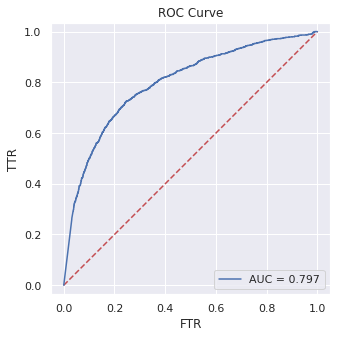

In [26]:
roc_auc = roc_auc_score(y_test, y_predicted_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:, 1])

fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal');
ax.plot([0, 1], [0, 1],'r--')
ax.plot(fpr, tpr, label = "AUC = {:0.3f}".format(roc_auc))
ax.legend(loc = 'lower right')
ax.set_xlabel('FTR')
ax.set_ylabel('TTR')
ax.set_title('ROC Curve');

Unfortunately our Classification Report and Model Score are hard to interpretate because of imbalanced classes. Let's see what will happen if we use __over-sampling on test set__ as well

In [27]:
test_pipe = imbPipeline([('ct', model.named_steps['ct']), 
                         ('ros', model.named_steps['ros'])])

X_test_ovs, y_test_ovs =  test_pipe.sample(X_test, y_test)

y_ovs_predicted = model.named_steps['est'].predict(X_test_ovs)
y_ovs_predicted_proba = model.named_steps['est'].predict_proba(X_test_ovs)

Model Score = : 0.721
Confucion Matrix: 
[[8563 1415]
 [4154 5824]]

              precision    recall  f1-score   support

           0       0.67      0.86      0.75      9978
           1       0.80      0.58      0.68      9978

   micro avg       0.72      0.72      0.72     19956
   macro avg       0.74      0.72      0.72     19956
weighted avg       0.74      0.72      0.72     19956




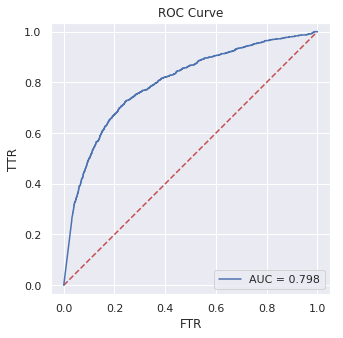

In [28]:
print('Model Score = : {:0.3f}'.format(model.named_steps['est'].score(X_test_ovs, y_test_ovs)))
print('Confucion Matrix: ')
print(confusion_matrix(y_test_ovs, y_ovs_predicted))
print()
print(classification_report(y_test_ovs, y_ovs_predicted))
print()

roc_auc = roc_auc_score(y_test_ovs, y_ovs_predicted_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test_ovs, y_ovs_predicted_proba[:, 1])

fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal');
ax.plot([0, 1], [0, 1],'r--')
ax.plot(fpr, tpr, label = "AUC = {:0.3f}".format(roc_auc))
ax.legend(loc = 'lower right')
ax.set_xlabel('FTR')
ax.set_ylabel('TTR')
ax.set_title('ROC Curve');

Just as we noticed earlier Classification Report and Model Score change their behavior when we over-sample the testing set. Moreover this approach is hard to maintain and understand due to fact that we need to manually cut the pipeline. 

Fortunately another indicator Area Under Curve (AUC) of Receiver Operating Characteristic (ROC) can be used as a one-parameter measurement to ensure that we follow into the wright direction. We will use it as a Grid Search Score and as an indicator to compare between differet algoritms. We will inspect other measurements but at this point we regard AUC as a most important.

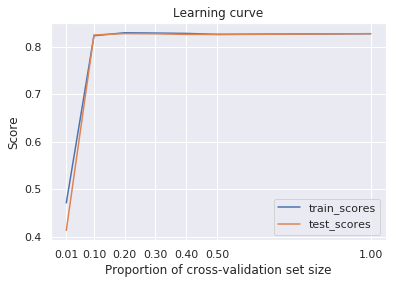

In [29]:
x_ticks = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]

train_sizes_abs, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                                                            train_sizes=x_ticks, 
                                                            cv = 5)
train_scores_y = train_scores.mean(axis=1)
test_scores_y = test_scores.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(x_ticks, train_scores_y, label = 'train_scores')
ax.plot(x_ticks, test_scores_y, label = 'test_scores')
ax.set_xlabel('Proportion of cross-validation set size')
ax.set_xticks(x_ticks)
ax.set_ylabel('Score')
ax.set_title('Learning curve')
ax.legend();

Learning curve shows that the learning process converges pretty quick (20%) into satisfactory result and remains more or less on the same level.
It is rare that we achieve the best result for 20% of dataset but it might be because of the following reasons:
- there can be some outliers located in different places of the dataset, they can be taken into consideration at 10%, 30% or 100% of learning curve
- imbalanced classes has influence on the _Score_ indicator value, there is always some randomness due to fact how many _0's and 1's_ land in train and test set

Nevertheless, we regard output of 100% of dataset as the most certain and final one.


<a id="ch3"></a>

# 3. Machine Learning - algorithm casting

For GaussianNB algoritm training procedure lasted very short (a couple of seconds) but we but we expect that for more sophisticated algoritms we might need a smaller dataset. Let's prepare a smaller dataset for further purposes.

We use the following data sets: 

* X, y - full data set
* X_20, y_20 - reduced data set (20%)

In [30]:
X_80, X_20, y_80, y_20 = train_test_split(X, y, random_state = 0, test_size = 0.2)

It is always worth to consider the dimensionality reduction results. Let's see a couple of results.

In [31]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown


In [32]:
def plot_reduced_dimensions(X, y, estimator, estimator_name, to_print=True):
    """Print 2D Map of given features matrix X reduced by given estimator. 
    Returns trained dimensionality reduction estimator (part of pipeline)"""
    t0 = time()
    
    cat_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind == 'O']
    num_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind != 'O']
    
    num_steps = ('ss', StandardScaler(), num_cols)
    cat_steps = ('ohe', OneHotEncoder(sparse=False), cat_cols)    
    ct = ColumnTransformer(transformers=[cat_steps, num_steps])

    ml_pipeline = imbPipeline([('ct', ct),
                               ('est', estimator)])
    res = ml_pipeline.fit_transform(X)
    
    if to_print:
        res_0 = res[y==0]
        res_1 = res[y==1]
        fig, ax = plt.subplots(1,2, figsize = (11,5), sharex=True, sharey=True)
        sns.kdeplot(res_0[:,0], res_0[:,1], cmap = 'Reds', shade=True, shade_lowest=False, ax=ax[0])
        sns.kdeplot(res_1[:,0], res_1[:,1], cmap = 'Greens', shade=True, shade_lowest=False, ax = ax[1])
        ax[0].patch.set_facecolor('black')
        ax[1].patch.set_facecolor('black')

        fig.suptitle('Dimensionality reduction using {} (t = {:.2f}s)'.format(estimator_name, time()-t0))
        ax[0].set_title('Density plot for y=0')
        ax[1].set_title('Density plot for y=1')

    return ml_pipeline.named_steps['est']

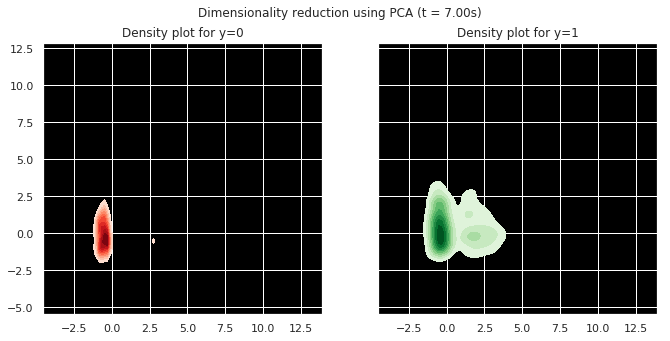

In [33]:
plot_reduced_dimensions(X_20, y_20, PCA(2), 'PCA');

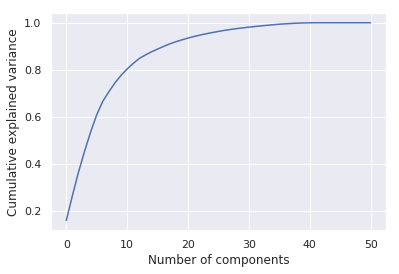

In [34]:
pca = plot_reduced_dimensions(X_20, y_20, PCA(), 'PCA', to_print=False)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

PCA gives us two news:
* bad: linear dimensionality reduction down to 2 dimensions does not result in any visible to the naked eye separation of dataset
* good: we can reduce our complexity down to some about 30 features without loosing too much data (too much variance)

Let's have a quick look at two non-linear algoritms

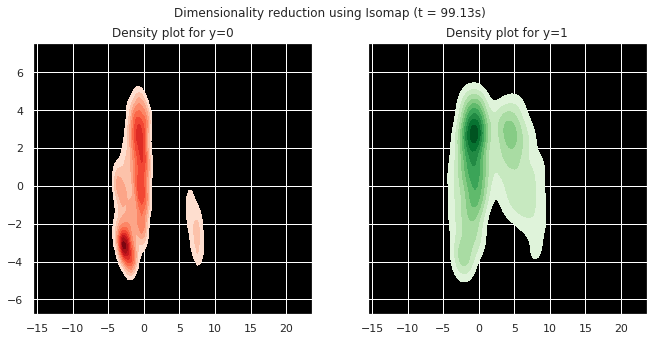

In [35]:
plot_reduced_dimensions(X_20, y_20, Isomap(n_neighbors=20, n_components=2), 'Isomap');

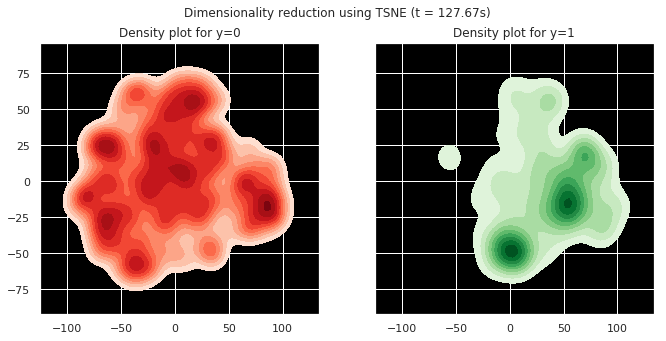

In [36]:
plot_reduced_dimensions(X_20, y_20, TSNE(n_components=2, init='pca', random_state=0), 'TSNE');

Dimensionality reduction hasn't given us a clear clue. Unfortunately in _PCA_ and _Isomap_ peaks at the 2D plot are located in the same point. _TSNE_ output seems to separate the data in more convenient way for the purpose of visualization.

Now it is the time to harness Machine Learning algoritms. We will test a couple of candidats using the following workflow in chapter 3:
1. Build a pipeline 
    * _ColumnTransformer_ + _OneHotEncoder_ to get rid of strings in categorical columns
    * _StandardScaler_ for Feature Scaling
    * _RandomOverSampler_ because of imbalanced classes
    * _Chosen Machine Learning Algoritm_
    * _GridSearchCV_ to choose hyperparameters
2. Test the pipeline with raw algoritm on 20% size dataset to get a quick look at the performance
3. Choose best hyperparametres using GridSearch fed with 20% size dataset
4. Train the final model with chosen hyperparameters (point 3) fed with 100% dataset
5. Comment results.

*for quick algoritms we will merge points 2-4 in one simple GridSearch

In [37]:
def plot_cls_rep_and_cnf_mat(y_test, y_predicted, estimator_name, model_score):
    """Print classification report and confusion matrix.
    Return nothing"""
    
    print('Model Score for {} = {:0.3f}'.format(estimator_name, model_score))
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, y_predicted))
    print()
    print('Classification Report: ')
    print(classification_report(y_test, y_predicted, digits=3)) 

In [38]:
def plot_roc_curve(fpr, tpr, roc_auc, ax = None):
    """Plot ROC Curve.
    Return nothing"""
    
    if ax == None:
        ax = plt.gca()
    
    ax.axis('equal');
    ax.plot([0, 1], [0, 1],'r--')
    ax.plot(fpr, tpr, label = "AUC = {:0.3f}".format(roc_auc))
    ax.legend(loc = 'lower right')
    ax.set_xlabel('FTR')
    ax.set_ylabel('TTR')
    ax.set_title('ROC Curve')

In [39]:
def plot_learning_curve(x_ticks, train_scores_y, test_scores_y, ax = None):
    """Plot learning curve.
    Return nothing"""
    
    ax.plot(x_ticks, train_scores_y, label = 'train_scores')
    ax.plot(x_ticks, test_scores_y, label = 'test_scores')
    ax.set_xlabel('Proportion of cross-validation set size')
    ax.set_xticks(x_ticks)
    ax.set_ylabel('Score')
    ax.set_title('Learning curve')
    ax.legend()

In [40]:
def find_and_summarize_algoritm(X, y, estimator, estimator_name, param_grid = None):
    """Print:
    - Algorithm best hyperparameters
    - Model Score, 
    - Confusion Matrix, 
    - ROC Curve 
    - Learning Curve 
    for the given algoritm chosen via Grid Search.
    
    Return tuple: 
    (estimator_name, number_of_examples, tuned, roc_auc, model_score, best_param_dict)"""
    
    t0 = time() #to calculate time spent
    number_of_examples =len(y) 
    if param_grid == None:
        param_grid = {}
    tuned = False if param_grid == {} else True    
    
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)
    kf = KFold(n_splits=5, shuffle=True, random_state=11)

    #column transformer
    cat_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind == 'O']
    num_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind != 'O']
    
    num_steps = ('ss', StandardScaler(), num_cols)
    cat_steps = ('ohe', OneHotEncoder(sparse=False), cat_cols)
    
    ct = ColumnTransformer(transformers=[cat_steps, num_steps])
    over_sampler = RandomOverSampler(random_state = 10)

    #machine learning pipeline
    ml_pipeline = imbPipeline([('ct', ct),
                               ('os', over_sampler), 
                               ('est', estimator)])
    #grid search
    grid = GridSearchCV(ml_pipeline, param_grid=param_grid, cv = kf, scoring='roc_auc')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    print('{} best hyperparameters = {}'.format(estimator_name, grid.best_params_))
    
    #calculating learning results
    y_predicted = model.predict(X_test)
    y_predicted_proba = model.predict_proba(X_test)
    model_score = model.score(X_test, y_test)
    
    #printing classification report and confusion matrix
    plot_cls_rep_and_cnf_mat(y_test, y_predicted, estimator_name, model_score)
    
    #calculating ROC Curve
    roc_auc = roc_auc_score(y_test, y_predicted_proba[:, 1])
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:, 1])
    
    #plot ROC Curve
    fig, ax = plt.subplots(1,2, figsize=(11,5))
    plot_roc_curve(fpr, tpr, roc_auc, ax = ax[0])
    
    #calculating Learning Curve
    x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 1]
    train_sizes_abs, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                                                                train_sizes=x_ticks, cv = 5)
    train_scores_y = train_scores.mean(axis=1)
    test_scores_y = test_scores.mean(axis=1)
    
    #plot Learning Curve
    plot_learning_curve(x_ticks, train_scores_y, test_scores_y, ax = ax[1])
    timer = time()-t0
    fig.suptitle('{} - summary (t={:.2f}s)'.format(estimator_name, timer), size = 15)
    
    # change grid.best_params_{'est__parameter': True} into {'est__parameter': [True]}
    # to easy plug in to function once again 
    best_param_dict = {key : [grid.best_params_[key]] for key in grid.best_params_.keys()}
    
    return (estimator_name, number_of_examples, tuned, roc_auc, model_score, best_param_dict)

### Result container - variable naming convention ("summary_GNB_df_tn")

We will store "find_and_summarize_algoritm" function output in a variable with specified name:

'summary' - keyword

'GNB' - algoritm signature 

'df'- dataset full/dataset reduced (df/dr)

'tn'- tuned parameters yes/no (ty/tn)

<a id="ch31"></a>
## 3.1 Gaussian Naive Bayes

Gaussian NB best hyperparameters = {}
Model Score for Gaussian NB = 0.834
Confusion Matrix: 
[[8670 1342]
 [ 530  761]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.942     0.866     0.903     10012
           1      0.362     0.589     0.448      1291

   micro avg      0.834     0.834     0.834     11303
   macro avg      0.652     0.728     0.675     11303
weighted avg      0.876     0.834     0.851     11303



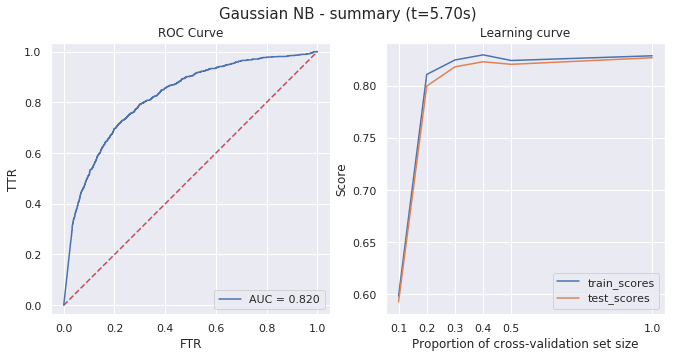

In [41]:
summary_GNB_df_tn = find_and_summarize_algoritm(X, y, GaussianNB(), 'Gaussian NB');

As we mentioned before GaussianNB learns quick. Unfortunately its AUC is not the best. It has pretty no tunable parameters.

<a id="ch32"></a>
## 3.2 Logistic Regression

Logistic Regression best hyperparameters = {'est__C': 0.1}
Model Score for Logistic Regression = 0.843
Confusion Matrix: 
[[8474 1538]
 [ 238 1053]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.973     0.846     0.905     10012
           1      0.406     0.816     0.543      1291

   micro avg      0.843     0.843     0.843     11303
   macro avg      0.690     0.831     0.724     11303
weighted avg      0.908     0.843     0.864     11303



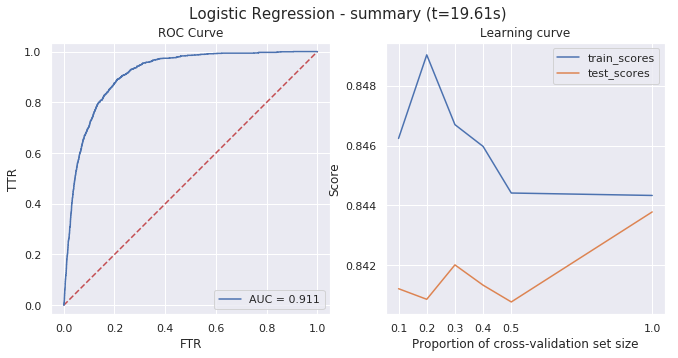

In [42]:
summary_LRE_df_ty = find_and_summarize_algoritm(X, y, 
                            LogisticRegression(solver = 'liblinear'),
                            param_grid = {
                                'est__C':[0.01, 0.1, 1],
                            },
                            estimator_name='Logistic Regression');

AUC value reaveals good analysis result. Learning curves do not indicate high bias nor high variance. At the beginning we see some noise but later they converge to some reasonable value.

We can try to change the output of our algoritm using Class Weights. This choice depends on particular business conditions: "What is the purpose of our job?"

If we would like to select more persons who are possibly willing to buy our product (True Positive) we can apply Class Weights such as in example below.

Logistic Regression (class weights) best hyperparameters = {}
Model Score for Logistic Regression (class weights) = 0.836
Confusion Matrix: 
[[8377 1635]
 [ 218 1073]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.975     0.837     0.900     10012
           1      0.396     0.831     0.537      1291

   micro avg      0.836     0.836     0.836     11303
   macro avg      0.685     0.834     0.719     11303
weighted avg      0.909     0.836     0.859     11303



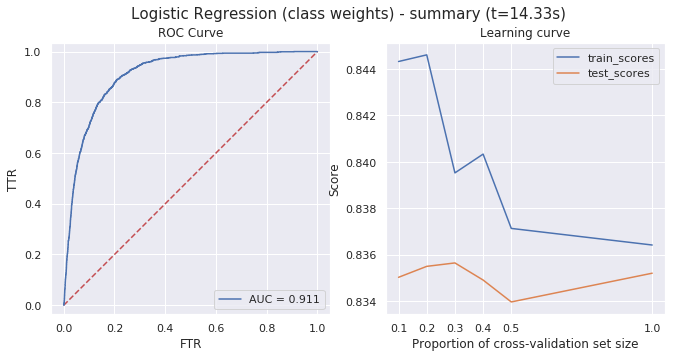

In [43]:
find_and_summarize_algoritm(X, y, 
                            LogisticRegression(solver = 'liblinear', class_weight = {0:1, 1:1.1}),
                            param_grid = {},
                            estimator_name='Logistic Regression (class weights)');

This intervention increases Recall and decrease Precision. Unfortunately we notice that False Positive rises rapidly in our case because of imbalanced classes.

ROC Curve reamains the same because in this approach we only manipulate the threshold.  In our further considerations we skip this hyperparameters.

<a id="ch33"></a>
## 3.3 Random Forest Classifier

Random Forest Classifier best hyperparameters = {}
Model Score for Random Forest Classifier = 0.888
Confusion Matrix: 
[[1917   60]
 [ 194   90]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.908     0.970     0.938      1977
           1      0.600     0.317     0.415       284

   micro avg      0.888     0.888     0.888      2261
   macro avg      0.754     0.643     0.676      2261
weighted avg      0.869     0.888     0.872      2261



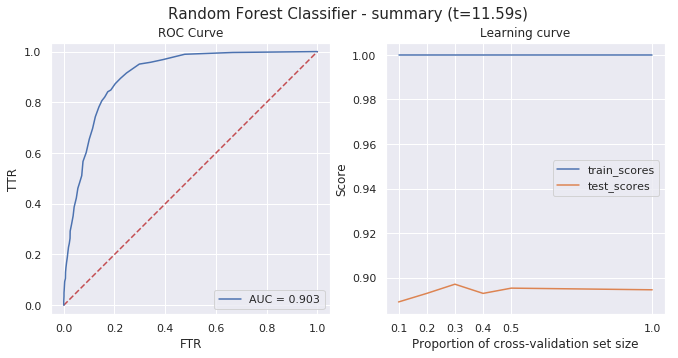

In [44]:
summary_RFC_dr_tn = find_and_summarize_algoritm(X_20, y_20, 
                            RandomForestClassifier(n_estimators=50),
                            param_grid = {}, 
                            estimator_name='Random Forest Classifier');

Random Forest Classifier best hyperparameters = {'est__max_depth': 30, 'est__max_features': 'sqrt', 'est__min_samples_leaf': 5, 'est__min_samples_split': 5, 'est__n_estimators': 50}
Model Score for Random Forest Classifier = 0.870
Confusion Matrix: 
[[1770  207]
 [  86  198]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.954     0.895     0.924      1977
           1      0.489     0.697     0.575       284

   micro avg      0.870     0.870     0.870      2261
   macro avg      0.721     0.796     0.749      2261
weighted avg      0.895     0.870     0.880      2261



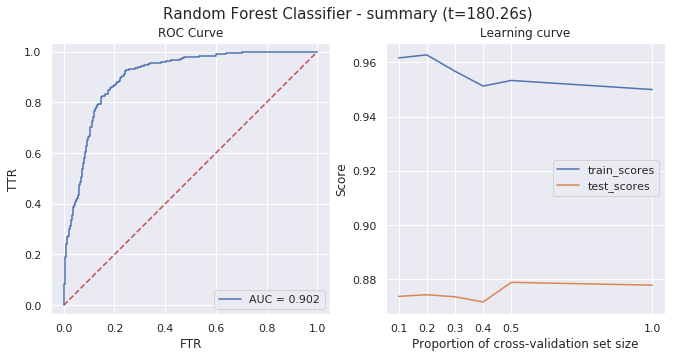

In [45]:
summary_RFC_dr_ty = find_and_summarize_algoritm(X_20, y_20, 
                            RandomForestClassifier(),
                            param_grid = {
                                'est__n_estimators' : [50],
                                'est__max_features' : ['log2', 'sqrt'],
                                'est__max_depth' : [None, 20, 30, 40],
                                'est__min_samples_split' : [2, 3, 5],
                                'est__min_samples_leaf' : [3, 5, 7],
                            }, 
                            estimator_name='Random Forest Classifier');

Random Forest Classifier best hyperparameters = {'est__max_depth': 30, 'est__max_features': 'sqrt', 'est__min_samples_leaf': 5, 'est__min_samples_split': 5, 'est__n_estimators': 50}
Model Score for Random Forest Classifier = 0.883
Confusion Matrix: 
[[8935 1077]
 [ 241 1050]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.974     0.892     0.931     10012
           1      0.494     0.813     0.614      1291

   micro avg      0.883     0.883     0.883     11303
   macro avg      0.734     0.853     0.773     11303
weighted avg      0.919     0.883     0.895     11303



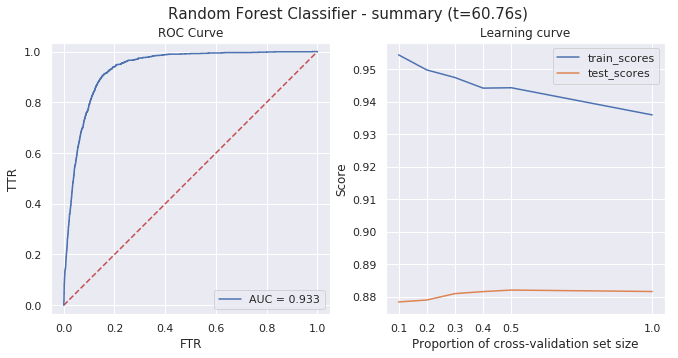

In [46]:
summary_RFC_df_ty = find_and_summarize_algoritm(X, y, 
                            RandomForestClassifier(),
                            param_grid = summary_RFC_dr_ty[-1], 
                            estimator_name='Random Forest Classifier');

Random Forest Classifier provides good AUC result but if we look at the learning curve we notice that we can go a couple of steps further. There is still a significant gap between _train_ and _test_ line. This shows we move towards high variance scenario. Result is satisfying but we could fight to upgrate the process (maybe increasing amount of estimators could help). 

It is also strange that using small set without any parameters tuned we can reach higher _Accuracy Scores_ (even in test set!). This is probably because of two reasons I mentioned at the end of _Chapter 2_. Fortunately ROC AUC value still behaves stable and satysfing.

<a id="ch34"></a>
## 3.4 XGBoost Classifier

XGBoost classifier best hyperparameters = {}
Model Score for XGBoost classifier = 0.828
Confusion Matrix: 
[[1646  331]
 [  58  226]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.966     0.833     0.894      1977
           1      0.406     0.796     0.537       284

   micro avg      0.828     0.828     0.828      2261
   macro avg      0.686     0.814     0.716      2261
weighted avg      0.896     0.828     0.849      2261



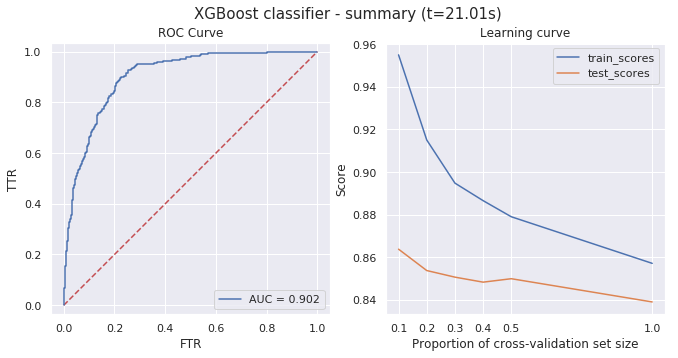

In [47]:
summary_XGB_dr_tn = find_and_summarize_algoritm(X_20, y_20, 
        XGBClassifier(),
        param_grid = {},
        estimator_name='XGBoost classifier');

__NOTE:__ Because of descent amount of hyperparameters and the complexity of the XGBClassifier algoritm we will fit the hyperparameters in two steps. This has to be done manually by hand.

XGBoost classifier best hyperparameters = {'est__booster': 'gbtree', 'est__gamma': 0.2, 'est__learning_rate': 0.2, 'est__max_depth': 3, 'est__min_child_weight': 1, 'est__subsample': 0.8}
Model Score for XGBoost classifier = 0.837
Confusion Matrix: 
[[1672  305]
 [  63  221]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.964     0.846     0.901      1977
           1      0.420     0.778     0.546       284

   micro avg      0.837     0.837     0.837      2261
   macro avg      0.692     0.812     0.723      2261
weighted avg      0.895     0.837     0.856      2261



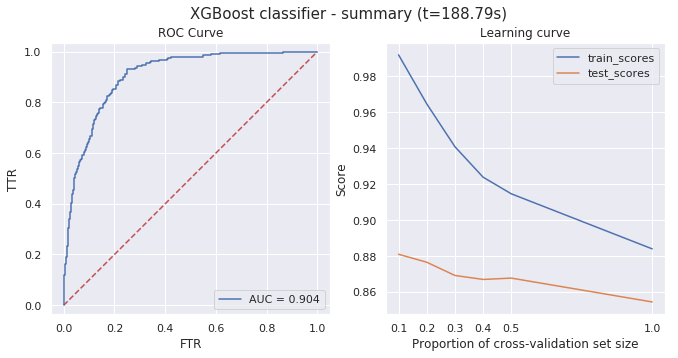

In [48]:
summary_XGB_dr_ty = find_and_summarize_algoritm(X_20, y_20, 
        XGBClassifier(n_jobs=-1),
        param_grid = {
            
#             'est__max_depth' : [2, 3, 4],
#             'est__learning_rate' : [0.1, 0.2, 0.3],
#             'est__booster': ['gbtree', 'gblinear']
            'est__min_child_weight': [0.5, 1, 2],
            'est__gamma': [0.1, 0.2, 0.3],
            'est__subsample': [0.7, 0.8, 0.9],
            
            'est__max_depth' : [3],
            'est__learning_rate' : [0.2],
            'est__booster': ['gbtree'],
#             'est__min_child_weight': [1],
#             'est__gamma': [0.2],
#             'est__subsample': [0.8]
        },
        estimator_name='XGBoost classifier');

XGBoost classifier best hyperparameters = {'est__booster': 'gbtree', 'est__gamma': 0.2, 'est__learning_rate': 0.2, 'est__max_depth': 3, 'est__min_child_weight': 1, 'est__subsample': 0.8}
Model Score for XGBoost classifier = 0.851
Confusion Matrix: 
[[8471 1541]
 [ 148 1143]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.983     0.846     0.909     10012
           1      0.426     0.885     0.575      1291

   micro avg      0.851     0.851     0.851     11303
   macro avg      0.704     0.866     0.742     11303
weighted avg      0.919     0.851     0.871     11303



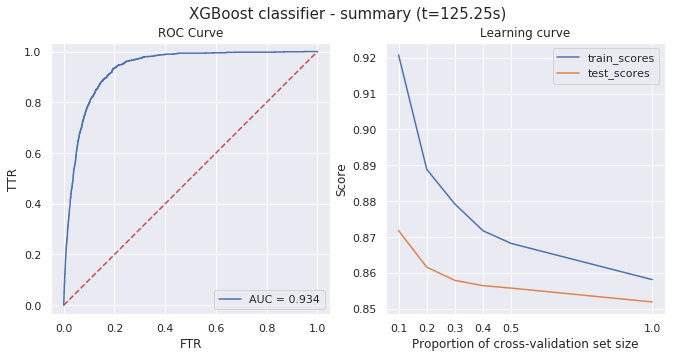

In [49]:
summary_XGB_df_ty = find_and_summarize_algoritm(X, y, 
        XGBClassifier(n_jobs=-1),
        param_grid = summary_XGB_dr_ty[-1],
        estimator_name='XGBoost classifier');

XGBoost Classifier gave us satisfying results. We see increasement of _Area Under Curve_ with naked eye especially in upper-right corner. Unfortunately test learning curve constantly is falling down (together with learning curve). Sometimes this behaviour indicates underfitting. In this case it is hard to say what is the reason of this anomaly. Probably XGBoost hasn't reach it's performance peak due to rough hyper - parameter tuning. Full XGBoost tuning may be an issue for a seperate notebook.

Another thing to notice is that _AUC_ was chosen as a _GridSearch_ score. This means we are lookin hyperparameters for the highest AUC hyperparameters (not Accuracy)

<a id="ch35"></a>
## 3.5 Gradient Boosting Classifier

Gradient Boosting Classifier best hyperparameters = {}
Model Score for Gradient Boosting Classifier = 0.828
Confusion Matrix: 
[[1645  332]
 [  58  226]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.966     0.832     0.894      1977
           1      0.405     0.796     0.537       284

   micro avg      0.828     0.828     0.828      2261
   macro avg      0.685     0.814     0.715      2261
weighted avg      0.895     0.828     0.849      2261



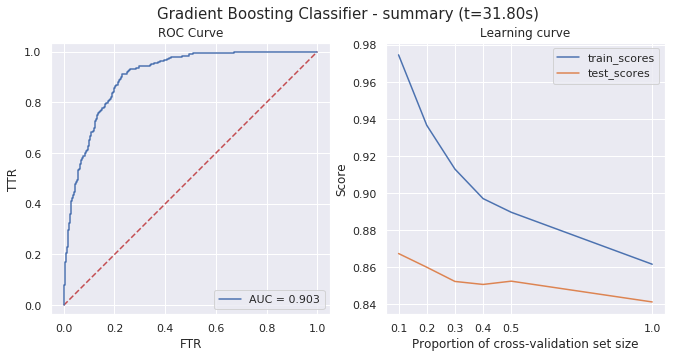

In [50]:
summary_GBC_dr_tn = find_and_summarize_algoritm(X_20, y_20, 
        GradientBoostingClassifier(),
        param_grid = {},
        estimator_name='Gradient Boosting Classifier');

Gradient Boosting Classifier best hyperparameters = {'est__max_depth': 5, 'est__min_samples_leaf': 60, 'est__min_samples_split': 3, 'est__subsample': 0.6}
Model Score for Gradient Boosting Classifier = 0.851
Confusion Matrix: 
[[1698  279]
 [  57  227]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.968     0.859     0.910      1977
           1      0.449     0.799     0.575       284

   micro avg      0.851     0.851     0.851      2261
   macro avg      0.708     0.829     0.742      2261
weighted avg      0.902     0.851     0.868      2261



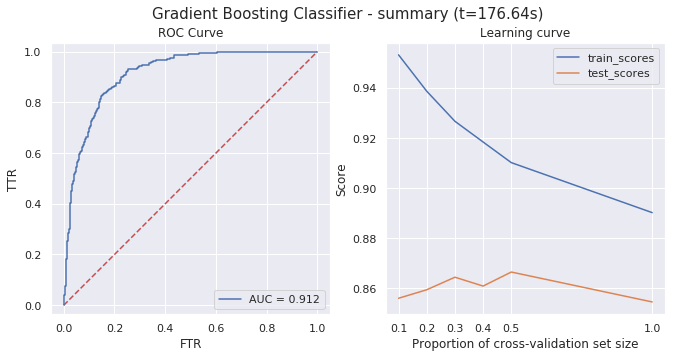

In [51]:
summary_GBC_dr_ty = find_and_summarize_algoritm(X_20, y_20, 
        GradientBoostingClassifier(),
        param_grid = {
            'est__min_samples_split': [3, 5, 10],
            'est__min_samples_leaf': [60, 80, 120],
#             'est__subsample': [0.5, 0.6, 0.8],
#             'est__max_depth': [2, 5, 10],
            
#             'est__min_samples_split': [5],
#             'est__min_samples_leaf': [80],
            'est__subsample': [0.6],
            'est__max_depth': [5]
        },
        estimator_name='Gradient Boosting Classifier');

Gradient Boosting Classifier best hyperparameters = {'est__max_depth': 5, 'est__min_samples_leaf': 60, 'est__min_samples_split': 3, 'est__subsample': 0.6}
Model Score for Gradient Boosting Classifier = 0.856
Confusion Matrix: 
[[8528 1484]
 [ 147 1144]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.983     0.852     0.913     10012
           1      0.435     0.886     0.584      1291

   micro avg      0.856     0.856     0.856     11303
   macro avg      0.709     0.869     0.748     11303
weighted avg      0.920     0.856     0.875     11303



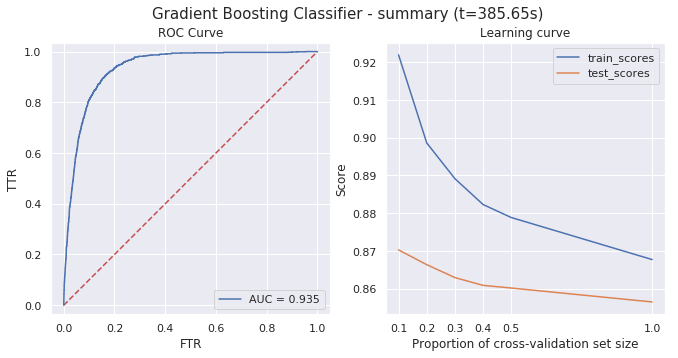

In [52]:
summary_GBC_df_ty = find_and_summarize_algoritm(X, y, 
        GradientBoostingClassifier(),
        param_grid = summary_GBC_dr_ty[-1],
        estimator_name='Gradient Boosting Classifier');

Our Gradient Boosting Classifier performance looks similarily as XGBoost. Colclusions are the same.

<a id="ch36"></a>
## 3.6 Algorithms performance schedule

We will comapre AUC values for differet algoritms

In [53]:
results = [
    summary_GNB_df_tn,
    
    summary_LRE_df_ty,
    
    summary_RFC_dr_tn,
    summary_RFC_dr_ty,
    summary_RFC_df_ty,
    
    summary_XGB_dr_tn,
    summary_XGB_dr_ty,
    summary_XGB_df_ty,
    
    summary_GBC_dr_tn,
    summary_GBC_dr_ty,
    summary_GBC_df_ty
]

In [54]:
results_table = pd.DataFrame(list(map(pd.Series, results))).drop(5, axis = 1)
results_table.columns = ['classifier', 'dataset_size_pct', 'tuned', 'auc', 'score' ]
results_table.dataset_size_pct = results_table.dataset_size_pct.multiply(1/len(y)*100).astype('int')
results_table

,classifier,dataset_size_pct,tuned,auc,score
0,Gaussian NB,100,False,0.820393,0.834380
1,Logistic Regression,100,True,0.910919,0.842874
2,Random Forest Classifier,20,False,0.903144,0.887660
3,Random Forest Classifier,20,True,0.902165,0.870411
4,Random Forest Classifier,100,True,0.933030,0.883394
5,XGBoost classifier,20,False,0.901635,0.827952
6,XGBoost classifier,20,True,0.904133,0.837240
7,XGBoost classifier,100,True,0.933991,0.850571
8,Gradient Boosting Classifier,20,False,0.903061,0.827510
9,Gradient Boosting Classifier,20,True,0.912102,0.851393


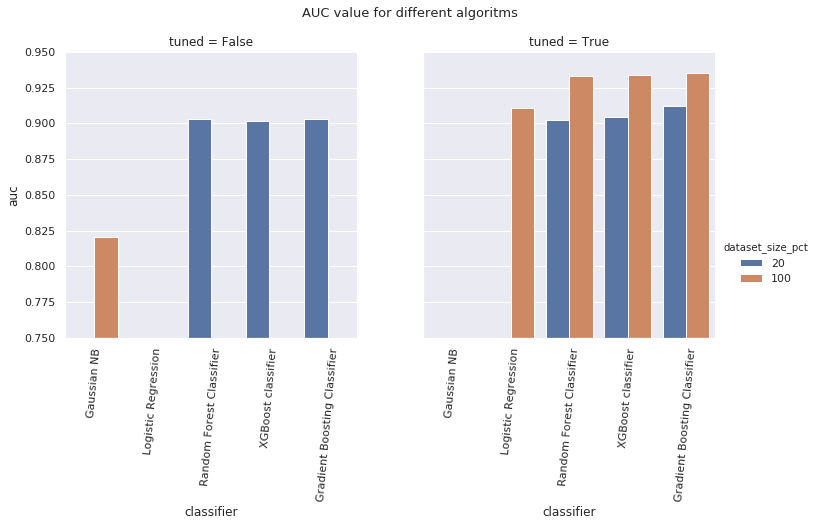

In [55]:
g = sns.catplot(x="classifier", y="auc", hue="dataset_size_pct",
            col="tuned", kind="bar", data=results_table);

g.set_xticklabels(g.axes[0][0].get_xticklabels(), rotation = 85);
g.set(ylim = (0.75, 0.95))
plt.gcf().suptitle('AUC value for different algoritms', size = 13, y = 1.05);

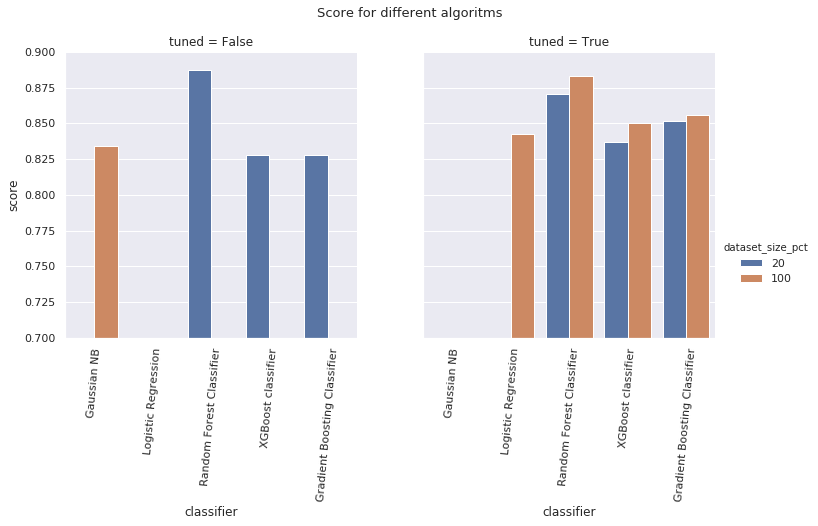

In [56]:
g = sns.catplot(x="classifier", y="score", hue="dataset_size_pct",
            col="tuned", kind="bar", data=results_table);

g.set_xticklabels(g.axes[0][0].get_xticklabels(), rotation = 85);
g.set(ylim = (0.7, 0.9))
plt.gcf().suptitle('Score for different algoritms', size = 13, y = 1.05);

<a id="ch37"></a>
## 3.7. Machine Learning Algorithms - Summary
three of the considered algorithms gave similar, good result:
* Random Forest Classifier
* XGBoost classifier	
* Gradient Boosting Classifier

_Gradient Boosting Classifier_ achieved the highest AUC result. 
_Random Forest Classifier_ achieved the highest Accuracy score result. 

The choice of the best algorithm is hard. _Random Forest Classifier_ reveals some sympthoms of overfitting, although _XGBoost classifier_ and _Gradient Boosting Classifier_ seems to move into underfitting.

### Next steps

In next chapters we are going to investigate following scenarios:
1. Using Recursive Feature Elimination (RFE) and dimensionality reduction (PCA) to decrease amount of features. Check the possibility to use more computionally expensive algorithms (SVC)
2. Checking the influence of _Feature Engineering_ made by hand due to conclusions from chapter 2 (eg. change of some numerical features into categorical)

In this chapter we will focus on two chosen algoritms with the best performance (Random Forest Classifier and Gradient Boosting Classifier) and Linear Regression as a good reference point.

<a id="ch4"></a>
# 4. Reducing number of features 
<a id="ch41"></a>
## 4.1. Recursive Feature Elimination (RFE)

In chapter 4 we divide our pipeline into 2 functions:
1. Decreasing the amount of features. (OneHotEncoder + Reducing the number of features)
2. Tuning the model (Over Sampler + Chosen Estimator)

This approach is significantly less computationaly expensive and gives more "guts" to see, which can be helpful for the beginners. The disadvantage of this approach is lower readability and difficulties in maintain.

In [57]:
# step 1a 
# we need to divide step1 into 2 parts because we want to make RFE calculations and GridSearch on 
# 20% of dataset, and later train the final estiamtor with full set of data

def calculate_RFE_mask(X, y, estimator, n_features = 30):
    """Return the mask (True/False) of features chosen by RFE."""
    
    #column transformer
    cat_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind == 'O']
    num_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind != 'O']
    
    num_steps = ('ss', StandardScaler(), num_cols)
    cat_steps = ('ohe', OneHotEncoder(sparse=False), cat_cols)
    
    ct = ColumnTransformer(transformers=[cat_steps, num_steps])
    over_sampler = RandomOverSampler(random_state = 10)

    ml_pipeline = imbPipeline([('ct', ct),
                               ('os', over_sampler),
                               ('rfe', RFE(estimator, n_features))])
    ml_pipeline.fit(X, y)

    return ml_pipeline.named_steps['rfe'].support_

In [58]:
#step 1b
def reduce_X(X, mask):
    """Return the features matrix with particular features selected by the provided mask. 
    """
    
    #column transformer
    cat_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind == 'O']
    num_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind != 'O']
    
    num_steps = ('ss', StandardScaler(), num_cols)
    cat_steps = ('ohe', OneHotEncoder(sparse=False), cat_cols)
    
    ct = ColumnTransformer(transformers=[cat_steps, num_steps])

    return ct.fit_transform(X)[:, mask]

In [59]:
#step 2
def find_and_summarize_algoritm_reduced(X, y, estimator, estimator_name, param_grid = None):
    """Print:
    - Algorithm best hyperparameters
    - Model Score, 
    - Confusion Matrix, 
    - ROC Curve 
    - Learning Curve 
    for the given algoritm chosen via Grid Search.
    
    Note: 
    - find_and_summarize_algoritm - pipe contains ColumnTransformet
    - find_and_summarize_algoritm_reduced - pipe does NOT contain ColumnTransformet
    
    Return tuple: 
    (estimator_name, number_of_examples, tuned, roc_auc, model_score, best_param_dict)"""
    
    t0 = time() #to calculate time spent
    number_of_examples =len(y) 
    if param_grid == None:
        param_grid = {}        
    tuned = False if param_grid == {} else True    
    
    
    over_sampler = RandomOverSampler(random_state = 10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)
    kf = KFold(n_splits=5, shuffle=True, random_state=11)

    ml_pipeline = imbPipeline([('os', over_sampler), # ColumnTransformer outside this function
                               ('est', estimator)])

    grid = GridSearchCV(ml_pipeline, param_grid=param_grid, cv = kf, scoring='roc_auc')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    print('{} best hyperparameters = {}'.format(estimator_name, grid.best_params_))
    
    #calculating learning results
    y_predicted = model.predict(X_test)
    y_predicted_proba = model.predict_proba(X_test)
    model_score = model.score(X_test, y_test)
    
    #printing classification report and confusion matrix
    plot_cls_rep_and_cnf_mat(y_test, y_predicted, estimator_name, model_score)
    
    #calculating ROC Curve
    roc_auc = roc_auc_score(y_test, y_predicted_proba[:, 1])
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:, 1])
    
    #plot ROC Curve
    fig, ax = plt.subplots(1,2, figsize=(11,5))
    plot_roc_curve(fpr, tpr, roc_auc, ax = ax[0])
    
    #calculating Learning Curve
    x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 1]
    train_sizes_abs, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                                                                train_sizes=x_ticks, cv = 5)
    train_scores_y = train_scores.mean(axis=1)
    test_scores_y = test_scores.mean(axis=1)
    
    #plot Learning Curve
    plot_learning_curve(x_ticks, train_scores_y, test_scores_y, ax = ax[1])
    timer = time()-t0
    fig.suptitle('{} - summary (t={:.2f}s)'.format(estimator_name, timer), size = 15)
    
    # change grid.best_params_{'est__parameter': True} into {'est__parameter': [True]}
    # to easy plug in to function once again 
    best_param_dict = {key : [grid.best_params_[key]] for key in grid.best_params_.keys()}
    
    return (estimator_name, number_of_examples, tuned, roc_auc, model_score, best_param_dict)

<a id="ch411"></a>
### 4.1.1. RFE for Random Forest Classifier

Random Forest Classifier + RFE best hyperparameters = {'est__max_depth': None, 'est__max_features': 'sqrt', 'est__min_samples_leaf': 3, 'est__min_samples_split': 3, 'est__n_estimators': 50}
Model Score for Random Forest Classifier + RFE = 0.874
Confusion Matrix: 
[[1807  170]
 [ 114  170]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.941     0.914     0.927      1977
           1      0.500     0.599     0.545       284

   micro avg      0.874     0.874     0.874      2261
   macro avg      0.720     0.756     0.736      2261
weighted avg      0.885     0.874     0.879      2261



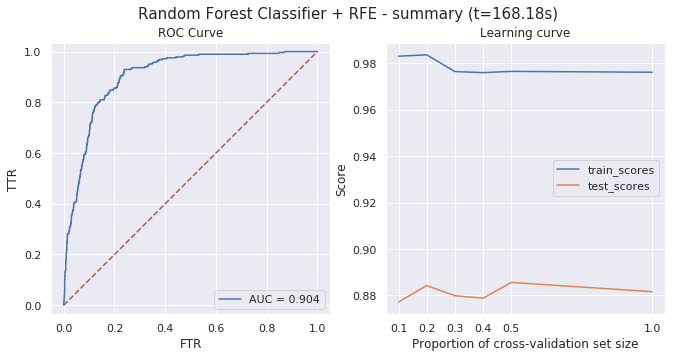

In [60]:
#calculating the mask with 20% of data
rfe_X_20_rfc_mask = calculate_RFE_mask(X = X_20, y = y_20, 
                        estimator=RandomForestClassifier(
                            max_depth = 30, 
                            max_features = 'sqrt',
                            min_samples_leaf = 5,
                            min_samples_split = 3,
                            n_estimators = 50))

# grid search for 20% of data with reduced number of features
summary_RFC_dr_ty_RFE = find_and_summarize_algoritm_reduced(
                            X = reduce_X(X_20, rfe_X_20_rfc_mask), 
                            y = y_20, 
                            estimator = RandomForestClassifier(),
                            param_grid = {
                                'est__n_estimators' : [50],
                                'est__max_features' : ['log2', 'sqrt'],
                                'est__max_depth' : [None, 20, 30, 40],
                                'est__min_samples_split' : [2, 3, 5],
                                'est__min_samples_leaf' : [3, 5, 10],
                                        }, 
                            estimator_name='Random Forest Classifier + RFE');

Random Forest Classifier + RFE best hyperparameters = {'est__max_depth': None, 'est__max_features': 'sqrt', 'est__min_samples_leaf': 3, 'est__min_samples_split': 3, 'est__n_estimators': 50}
Model Score for Random Forest Classifier + RFE = 0.892
Confusion Matrix: 
[[9109  903]
 [ 323  968]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.966     0.910     0.937     10012
           1      0.517     0.750     0.612      1291

   micro avg      0.892     0.892     0.892     11303
   macro avg      0.742     0.830     0.775     11303
weighted avg      0.915     0.892     0.900     11303



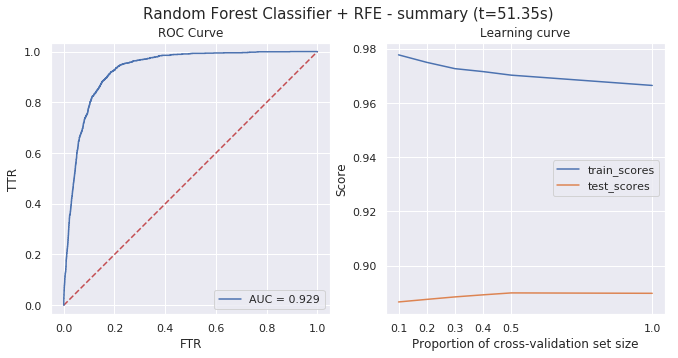

In [61]:
# train the estimator with 100% of data with reduced number of features using chosen parameters of grid search
summary_RFC_df_ty_RFE = find_and_summarize_algoritm_reduced(
                            X = reduce_X(X, rfe_X_20_rfc_mask), 
                            y = y, 
                            estimator = RandomForestClassifier(),
                            param_grid = summary_RFC_dr_ty_RFE[-1],
                            estimator_name='Random Forest Classifier + RFE');

Results for Random Forest Classifier + RFA are satysfying. However, there is the same issue as in chapter 3.3 with a gap between train/test learning curve. On one hand this indicates on high variance. On the other hand gives us some hope to upgrade the performance.

<a id="ch412"></a>
### 4.1.2. RFE for Gradient Boosting Classifier

Gradient Boosting Classifier + RFE best hyperparameters = {'est__max_depth': 5, 'est__min_samples_leaf': 80, 'est__min_samples_split': 40, 'est__subsample': 0.7}
Model Score for Gradient Boosting Classifier + RFE = 0.851
Confusion Matrix: 
[[1698  279]
 [  57  227]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.968     0.859     0.910      1977
           1      0.449     0.799     0.575       284

   micro avg      0.851     0.851     0.851      2261
   macro avg      0.708     0.829     0.742      2261
weighted avg      0.902     0.851     0.868      2261



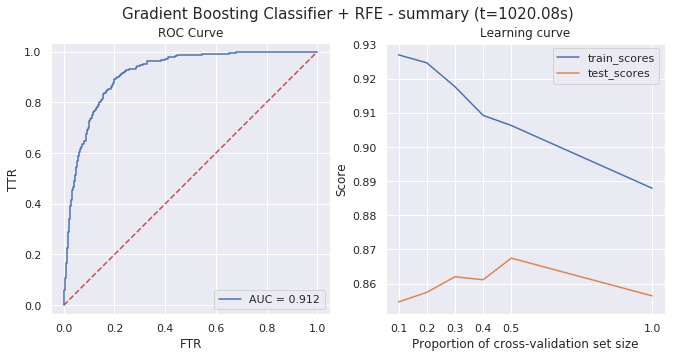

In [62]:
#calculating the mask with 20% of data
rfe_X_20_gbc_mask = calculate_RFE_mask(X = X_20, y = y_20, 
                        estimator=GradientBoostingClassifier(
                            min_samples_split = 20,
                            min_samples_leaf = 120,
                            subsample = 0.6,
                            max_depth = 5))

# grid search for 20% of data with reduced number of features
summary_GBC_dr_ty_RFE = find_and_summarize_algoritm_reduced(
                            X = reduce_X(X_20, rfe_X_20_gbc_mask), 
                            y = y_20, 
                            estimator = GradientBoostingClassifier(),
                            param_grid = {
                                'est__min_samples_split': [10, 20, 40],
                                'est__min_samples_leaf': [60, 80, 120],
                                'est__subsample': [0.6, 0.7, 0.8],
                                'est__max_depth': [3, 5, 8]
                                        }, 
                            estimator_name='Gradient Boosting Classifier + RFE');

Gradient Boosting Classifier + RFE best hyperparameters = {'est__max_depth': 5, 'est__min_samples_leaf': 80, 'est__min_samples_split': 40, 'est__subsample': 0.7}
Model Score for Gradient Boosting Classifier + RFE = 0.855
Confusion Matrix: 
[[8514 1498]
 [ 144 1147]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.983     0.850     0.912     10012
           1      0.434     0.888     0.583      1291

   micro avg      0.855     0.855     0.855     11303
   macro avg      0.709     0.869     0.747     11303
weighted avg      0.921     0.855     0.874     11303



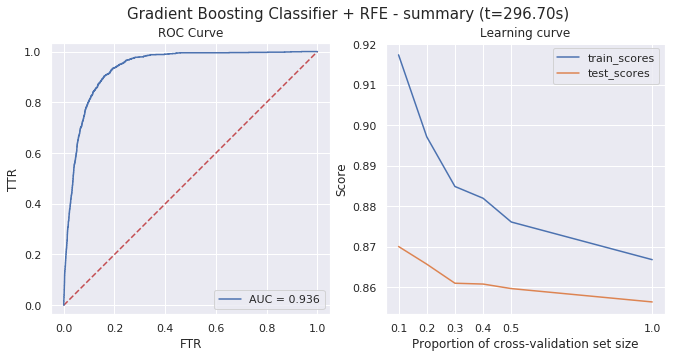

In [63]:
# train the estimator with 100% of data with reduced number of features using chosen parameters of grid search
summary_GBC_df_ty_RFE = find_and_summarize_algoritm_reduced(
                            X = reduce_X(X, rfe_X_20_gbc_mask), 
                            y = y, 
                            estimator = GradientBoostingClassifier(),
                            param_grid = summary_GBC_dr_ty_RFE[-1],
                            estimator_name='Gradient Boosting Classifier + RFE');

Results for Gradient Boosting Classifier + RFA are semi-satysfying. Learning curves reveals the same sympthoms as in chapter 3.5.

<a id="ch413"></a>
### 4.1.3. RFE - Summary

In [64]:
results_RFE = [
    summary_RFC_dr_ty,
    summary_RFC_dr_ty_RFE,
    summary_RFC_df_ty,
    summary_RFC_df_ty_RFE,
    
    summary_GBC_dr_ty,
    summary_GBC_dr_ty_RFE,
    summary_GBC_df_ty,
    summary_GBC_df_ty_RFE
]

results_table_RFE = pd.DataFrame(list(map(pd.Series, results_RFE))).drop(5, axis = 1)
results_table_RFE.columns = ['classifier', 'dataset_size_pct', 'tuned', 'auc', 'score' ]
results_table_RFE.dataset_size_pct = results_table_RFE.dataset_size_pct.multiply(1/len(y)*100).astype('int')
results_table_RFE

,classifier,dataset_size_pct,tuned,auc,score
0,Random Forest Classifier,20,True,0.902165,0.870411
1,Random Forest Classifier + RFE,20,True,0.903789,0.874392
2,Random Forest Classifier,100,True,0.933030,0.883394
3,Random Forest Classifier + RFE,100,True,0.929327,0.891533
4,Gradient Boosting Classifier,20,True,0.912102,0.851393
5,Gradient Boosting Classifier + RFE,20,True,0.912328,0.851393
6,Gradient Boosting Classifier,100,True,0.935251,0.855702
7,Gradient Boosting Classifier + RFE,100,True,0.935669,0.854729


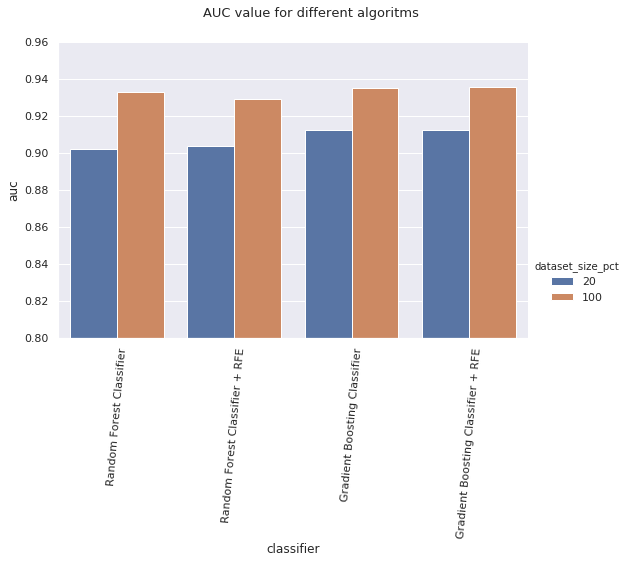

In [65]:
g = sns.catplot(x="classifier", y="auc", hue="dataset_size_pct", 
                kind="bar", data=results_table_RFE, aspect=1.5);

g.set_xticklabels(g.axes[0][0].get_xticklabels(), rotation = 85);
g.set(ylim = (0.8, 0.96))
plt.gcf().suptitle('AUC value for different algoritms', size = 13, y = 1.05);

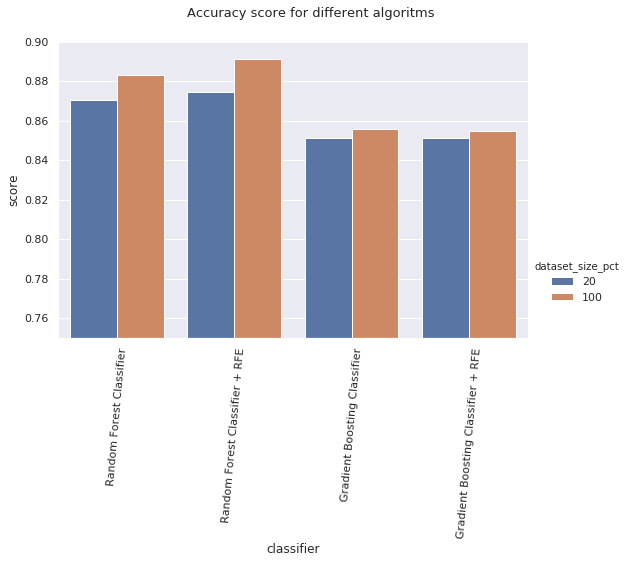

In [66]:
g = sns.catplot(x="classifier", y="score", hue="dataset_size_pct", 
                kind="bar", data=results_table_RFE, aspect=1.5);

g.set_xticklabels(g.axes[0][0].get_xticklabels(), rotation = 85);
g.set(ylim = (0.75, 0.9))
plt.gcf().suptitle('Accuracy score for different algoritms', size = 13, y = 1.05);


__AUC__: Reducing the number of features using Recursive Feature Elimination had some influence for the overall performance. 
AUC value went slightly down (as we expected) for the full set of data. Surprisingly result of the algorithm for the reduced (20%) dataset was equal of higher when RFE was applied. 

__Accuracy__ score for the cases without RFE applied had higher results for the reduced dataset (20%) that full dataset(100%). After we applied RFE this relationship has been reverced.


Due to referred results we may consider RFE as an good idea when we have a limited access to data and we can not provide a large dataset for our algorithm to train.

Moreover it is worth to mention that the reduction of features by 30% (51 features after encoding down to 30) saved us about 50% of time required for training on full dataset.

<a id="ch42"></a>
## 4.2. Dimensionality reduction with Principal Component Analysis (PCA)

Now we will try different approach. Instead of plain elimination of particular features we will use dimensionality reduction algoritms to get lower number of new features.

In [67]:
def reduce_X_by_dim_redu(X, y, estimator):
    """Apply OneHotEncoder and the given 'estimator' for features matrix X to reduce it's dimensionality 
    Returns transformed X"""
    
    cat_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind == 'O']
    num_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind != 'O']
    
    num_steps = ('ss', StandardScaler(), num_cols)
    cat_steps = ('ohe', OneHotEncoder(sparse=False), cat_cols)
    
    ct = ColumnTransformer(transformers=[cat_steps, num_steps])
    over_sampler = RandomOverSampler(random_state = 10)

    ml_pipeline = imbPipeline([('ct', ct),
                               ('os', over_sampler), #over sampler included, to consider
                               ('dre', estimator)])
    ml_pipeline.fit(X, y)

    return ml_pipeline.transform(X)

In [68]:
X_20_pca_d30 = reduce_X_by_dim_redu(X_20, y_20, PCA(30, random_state=0))
X_100_pca_d30 = reduce_X_by_dim_redu(X, y, PCA(30, random_state=0))

<a id="ch421"></a>
### 4.2.1. PCA + Logistic Regression

LogisticRegression + PCA best hyperparameters = {'est__C': 0.2}
Model Score for LogisticRegression + PCA = 0.818
Confusion Matrix: 
[[1634  343]
 [  68  216]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.960     0.827     0.888      1977
           1      0.386     0.761     0.512       284

   micro avg      0.818     0.818     0.818      2261
   macro avg      0.673     0.794     0.700      2261
weighted avg      0.888     0.818     0.841      2261



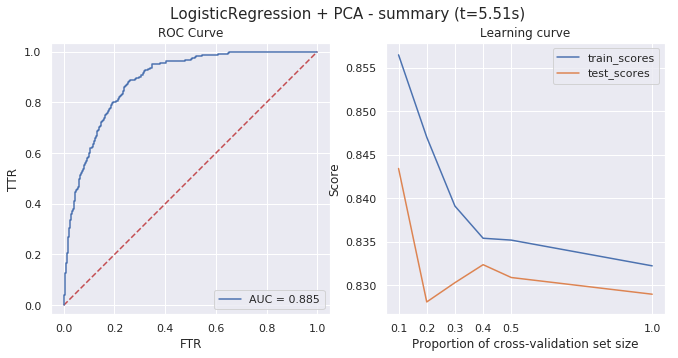

In [69]:
summary_LRE_dr_ty_PCA = find_and_summarize_algoritm_reduced(X_20_pca_d30, y_20, 
        LogisticRegression(solver = 'liblinear'),
        param_grid = {'est__C': [0.1, 0.2, 0.5]},
        estimator_name='LogisticRegression + PCA');

LogisticRegression + PCA best hyperparameters = {'est__C': 50}
Model Score for LogisticRegression + PCA = 0.833
Confusion Matrix: 
[[8363 1649]
 [ 243 1048]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.972     0.835     0.898     10012
           1      0.389     0.812     0.526      1291

   micro avg      0.833     0.833     0.833     11303
   macro avg      0.680     0.824     0.712     11303
weighted avg      0.905     0.833     0.856     11303



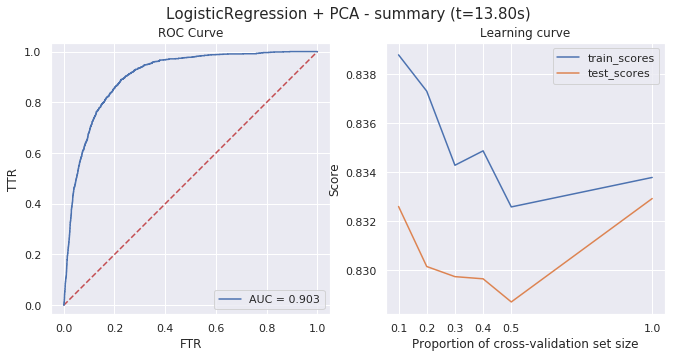

In [70]:
summary_LRE_df_ty_PCA = find_and_summarize_algoritm_reduced(X_100_pca_d30, y, 
        LogisticRegression(solver = 'liblinear'),
        param_grid = {'est__C': [20, 50, 100]},
        estimator_name='LogisticRegression + PCA');

_Logistic Regression + PCA_: Despite some non-monotonical behaviour learning curves converges into some reasonable result. Result for reduced dataset is suspecious but using all the data we receive good output.

<a id="ch422"></a>
### 4.2.2. PCA + Random Forest Classifier

Random Forest Classifier + PCA best hyperparameters = {'est__max_depth': 30, 'est__min_samples_leaf': 10, 'est__min_samples_split': 3, 'est__n_estimators': 50}
Model Score for Random Forest Classifier + PCA = 0.870
Confusion Matrix: 
[[1778  199]
 [  94  190]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.950     0.899     0.924      1977
           1      0.488     0.669     0.565       284

   micro avg      0.870     0.870     0.870      2261
   macro avg      0.719     0.784     0.744      2261
weighted avg      0.892     0.870     0.879      2261



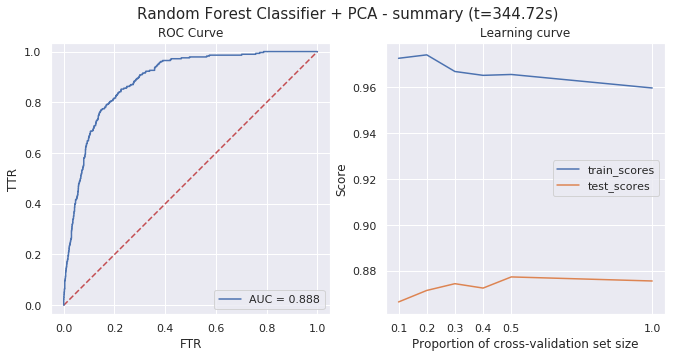

In [71]:
summary_RFC_dr_ty_PCA = find_and_summarize_algoritm_reduced(
                            X = X_20_pca_d30, 
                            y = y_20, 
                            estimator = RandomForestClassifier(),
                            param_grid = {
                                'est__n_estimators' : [50],
                                'est__max_depth' : [None, 10, 20, 30],
                                'est__min_samples_split' : [3, 5, 10],
                                'est__min_samples_leaf' : [10, 20, 30],
                                        }, 
                            estimator_name='Random Forest Classifier + PCA');

Random Forest Classifier + PCA best hyperparameters = {'est__max_depth': 30, 'est__min_samples_leaf': 10, 'est__min_samples_split': 3, 'est__n_estimators': 50}
Model Score for Random Forest Classifier + PCA = 0.884
Confusion Matrix: 
[[9040  972]
 [ 341  950]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.964     0.903     0.932     10012
           1      0.494     0.736     0.591      1291

   micro avg      0.884     0.884     0.884     11303
   macro avg      0.729     0.819     0.762     11303
weighted avg      0.910     0.884     0.893     11303



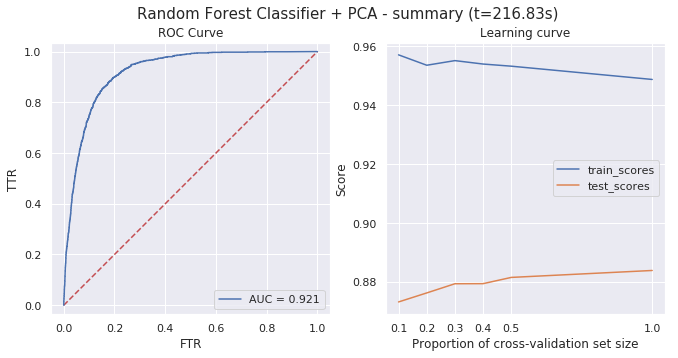

In [72]:
summary_RFC_df_ty_PCA = find_and_summarize_algoritm_reduced(
                            X = X_100_pca_d30, 
                            y = y, 
                            estimator = RandomForestClassifier(),
                            param_grid =summary_RFC_dr_ty_PCA[-1],
                            estimator_name='Random Forest Classifier + PCA');

_Random Forest Classifier + PCA_: Result seems to be quite satisfying. The gap (see chapter 3.3) hasn't been reduced but AUC value is proper.

<a id="ch423"></a>

### 4.2.3. PCA + Support Vector Classifier

SVC + PCA best hyperparameters = {'est__C': 1}
Model Score for SVC + PCA = 0.812
Confusion Matrix: 
[[1608  369]
 [  57  227]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.966     0.813     0.883      1977
           1      0.381     0.799     0.516       284

   micro avg      0.812     0.812     0.812      2261
   macro avg      0.673     0.806     0.699      2261
weighted avg      0.892     0.812     0.837      2261



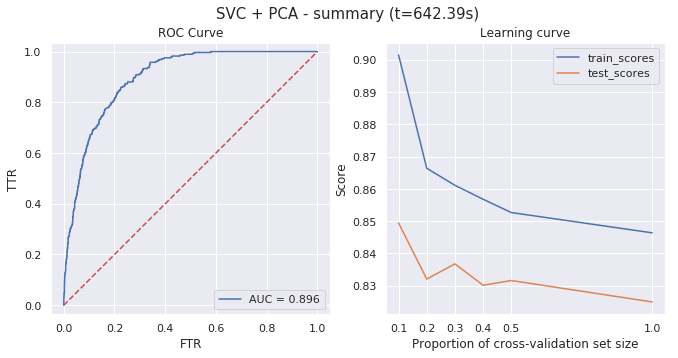

In [73]:
summary_SVC_dr_ty_PCA = find_and_summarize_algoritm_reduced(X_20_pca_d30, y_20, 
        SVC(probability = True, gamma = 'auto'),
        param_grid = {'est__C': [0.1, 1, 10]},
        estimator_name='SVC + PCA');

_Support Vector Classifier + PCA_: Thanks to dimensionality reduction we received a reasonable way to apply SVC for our task. The time required for calculations is significant. In this case use of Stochastic Gradient Descent might be a good idea: _SGDClassifier(loss='hinge')_

<a id="ch424"></a>
### 4.2.4. PCA - Summary

In [74]:
results_DRE = [
    
    summary_LRE_df_ty,
    
    summary_LRE_dr_ty_PCA,
    summary_LRE_df_ty_PCA,
    
    summary_RFC_dr_ty,
    summary_RFC_df_ty,
    
    summary_RFC_dr_ty_PCA,
    summary_RFC_df_ty_PCA,
    
    summary_SVC_dr_ty_PCA,
]

results_table_DRE = pd.DataFrame(list(map(pd.Series, results_DRE))).drop(5, axis = 1)
results_table_DRE.columns = ['classifier', 'dataset_size_pct', 'tuned', 'auc', 'score' ]
results_table_DRE.dataset_size_pct = results_table_DRE.dataset_size_pct.multiply(1/len(y)*100).astype('int')
results_table_DRE

,classifier,dataset_size_pct,tuned,auc,score
0,Logistic Regression,100,True,0.910919,0.842874
1,LogisticRegression + PCA,20,True,0.885228,0.818222
2,LogisticRegression + PCA,100,True,0.902659,0.832611
3,Random Forest Classifier,20,True,0.902165,0.870411
4,Random Forest Classifier,100,True,0.933030,0.883394
5,Random Forest Classifier + PCA,20,True,0.887816,0.870411
6,Random Forest Classifier + PCA,100,True,0.920978,0.883836
7,SVC + PCA,20,True,0.895718,0.811588


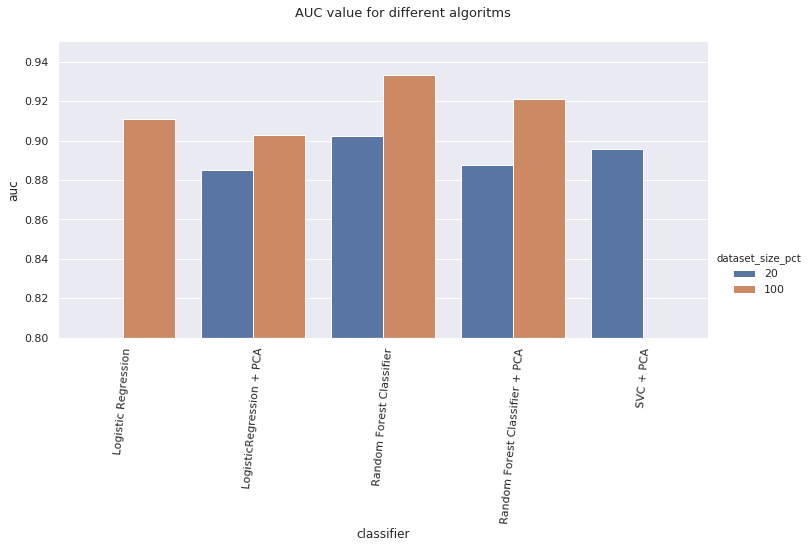

In [75]:
g = sns.catplot(x="classifier", y="auc", aspect=2,
                hue="dataset_size_pct", kind="bar", data=results_table_DRE);

g.set_xticklabels(g.axes[0][0].get_xticklabels(), rotation = 85);
g.set(ylim = (0.8, 0.95))
plt.gcf().suptitle('AUC value for different algoritms', size = 13, y = 1.05);

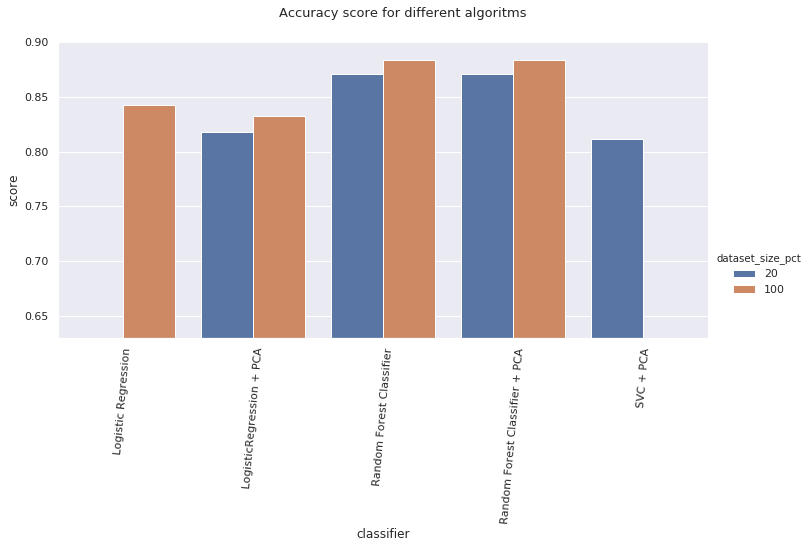

In [76]:
g = sns.catplot(x="classifier", y="score", aspect=2,
                hue="dataset_size_pct", kind="bar", data=results_table_DRE);

g.set_xticklabels(g.axes[0][0].get_xticklabels(), rotation = 85);
g.set(ylim = (0.63, 0.90))
plt.gcf().suptitle('Accuracy score for different algoritms', size = 13, y = 1.05);

1. _Dimensionality reduction_ in general lowered the AUC value (as we expected).
2. Time required for computation was significantly lower.
3. SVC gave the highest AUC value for the reduced (20%) dataset.

<a id="ch5"></a>

# 5. The influence of made by hand feature engineering (FE)

Feature engineering is one of the most important parts in the machine learning process. It should be done at the very beginning in an usual case. In our case we want to investigate the influence of handmade (done due to our intuition) features engineering for the algorithm performance.

Two features: _pdays_ and _previous_ has numerical value but a certain value has a _special_ meaning

In [77]:
print('pdays: ', column_description['pdays'])
print('previous: ', column_description['previous'])

pdays:  Number of days that passed by after the client was last contacted from a previous campaign
previous:  Number of contacts performed before this campaign and for this client


pdays = -1 means client was not previously contacted

previous = 0 if no contacts were performed before this campaign and for this client

These values has significant (~80%) contribution for these features

Our idea is to make new categorical features to encode this _special_ meaning. Moreover we will drop old feature.

In [78]:
data_fe = data.copy()

data_fe['prevoius_0'] = np.where(data_fe['previous'] == 0, 1, 0)
data_fe['prevoius_n0'] = np.where(data_fe['previous'] != 0, 1, 0)

data_fe['pdays_1'] = np.where(data_fe['previous'] == -1, 1, 0)
data_fe['pdays_n1'] = np.where(data_fe['previous'] != -1, 1, 0)

data_fe.drop(['pdays','previous'], axis=1, inplace=True)
data_fe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y,prevoius_0,prevoius_n0,pdays_1,pdays_n1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no,1,0,0,1


In [79]:
y_fe = (data_fe['y'] == 'yes').astype('int')
X_fe = data_fe.drop('y', axis=1)

def feature_engineering_X(X, y):
    """Return X with the following transformations applied:
    OneHotEncoder - for categorical columns
    StandardScaler - for numerical columns
    """
    
    cat_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind == 'O']
    num_cols = [X.columns[i] for i in range(len(X.dtypes)) if X.dtypes[i].kind != 'O']
    X[num_cols] = X[num_cols].astype('float')

    cat_trans = ('ohe', OneHotEncoder(sparse=False), cat_cols)
    num_trans = ('sts', StandardScaler(), num_cols )
    
    ct = ColumnTransformer(transformers=[cat_trans, num_trans])
    ct.fit(X, y)

    return ct.transform(X)


# encoding and scaling of X_fe (redefinition pd.DataFrame --> np.array)
X_fe = feature_engineering_X(X_fe, y_fe)

# subsets of 80% of data and 20% of data
X_fe_80, X_fe_20, y_fe_80, y_fe_20 = train_test_split(X_fe, y, random_state = 0, test_size = 0.2)

<a id="ch51"></a>

### 5.1. Influence of FE for Logistic Regression

LogisticRegression + FE best hyperparameters = {'est__C': 1000}
Model Score for LogisticRegression + FE = 0.843
Confusion Matrix: 
[[8481 1531]
 [ 238 1053]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.973     0.847     0.906     10012
           1      0.408     0.816     0.543      1291

   micro avg      0.843     0.843     0.843     11303
   macro avg      0.690     0.831     0.725     11303
weighted avg      0.908     0.843     0.864     11303



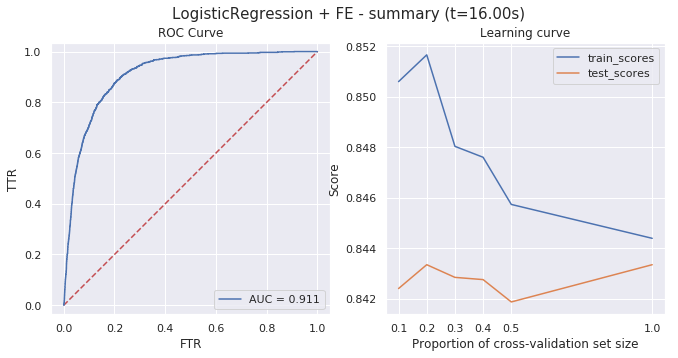

In [80]:
summary_LRE_df_ty_FE = find_and_summarize_algoritm_reduced(X_fe, y_fe, 
        LogisticRegression(solver = 'liblinear'),
        param_grid = {'est__C': [500, 1000, 2000]},
        estimator_name='LogisticRegression + FE');

<a id="ch52"></a>
### 5.2. Influence of FE for Random Forest Classifier

Random Forest Classifier + FE best hyperparameters = {'est__max_depth': 20, 'est__min_samples_leaf': 2, 'est__min_samples_split': 10, 'est__n_estimators': 50}
Model Score for Random Forest Classifier + FE = 0.868
Confusion Matrix: 
[[1811  166]
 [ 132  152]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.932     0.916     0.924      1977
           1      0.478     0.535     0.505       284

   micro avg      0.868     0.868     0.868      2261
   macro avg      0.705     0.726     0.714      2261
weighted avg      0.875     0.868     0.871      2261



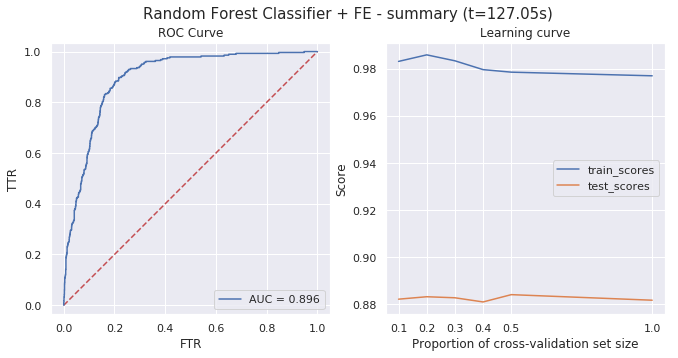

In [81]:
summary_RFC_dr_ty_FE = find_and_summarize_algoritm_reduced(X_fe_20, y_fe_20, 
                            RandomForestClassifier(n_jobs=-1),
                            param_grid = {
                                'est__n_estimators' : [50],
                                'est__max_depth' : [None, 10, 20, 40],
                                'est__min_samples_split' : [5, 10, 20, 30],
                                'est__min_samples_leaf' : [2, 4, 8],
                            }, 
                            estimator_name='Random Forest Classifier + FE');

Random Forest Classifier + FE best hyperparameters = {'est__max_depth': 20, 'est__min_samples_leaf': 2, 'est__min_samples_split': 10, 'est__n_estimators': 50}
Model Score for Random Forest Classifier + FE = 0.887
Confusion Matrix: 
[[9007 1005]
 [ 275 1016]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.970     0.900     0.934     10012
           1      0.503     0.787     0.614      1291

   micro avg      0.887     0.887     0.887     11303
   macro avg      0.737     0.843     0.774     11303
weighted avg      0.917     0.887     0.897     11303



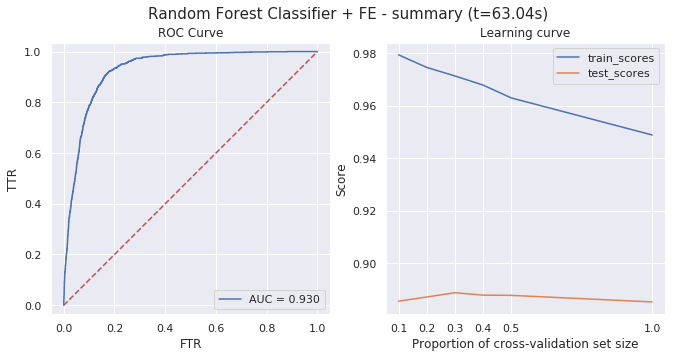

In [82]:
summary_RFC_df_ty_FE = find_and_summarize_algoritm_reduced(X_fe, y_fe, 
                            RandomForestClassifier(n_jobs=-1),
                            param_grid = summary_RFC_dr_ty_FE[-1],
                            estimator_name='Random Forest Classifier + FE');

<a id="ch53"></a>

### 5.3 Influence of FE for Gradient Boosting Classifier

Gradient Boosting Classifier + FE best hyperparameters = {'est__max_depth': 4, 'est__min_samples_leaf': 20, 'est__min_samples_split': 80, 'est__subsample': 0.7}
Model Score for Gradient Boosting Classifier + FE = 0.835
Confusion Matrix: 
[[1663  314]
 [  59  225]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.966     0.841     0.899      1977
           1      0.417     0.792     0.547       284

   micro avg      0.835     0.835     0.835      2261
   macro avg      0.692     0.817     0.723      2261
weighted avg      0.897     0.835     0.855      2261



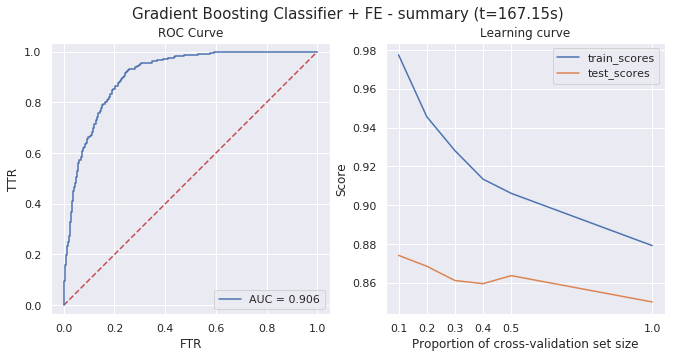

In [83]:
summary_GBC_dr_ty_FE = find_and_summarize_algoritm_reduced(
                            X = X_fe_20, 
                            y = y_fe_20, 
                            estimator = GradientBoostingClassifier(),
                            param_grid = {
                                'est__min_samples_split': [80, 120, 160],
                                'est__min_samples_leaf': [20, 40, 60],
#                                 'est__subsample': [0.6, 0.7, 0.8],
#                                 'est__max_depth': [2, 4, 6],
                                
#                                 'est__min_samples_split': [80],
#                                 'est__min_samples_leaf': [40],
                                'est__subsample': [0.7],
                                'est__max_depth': [4]
                                        }, 
                            estimator_name='Gradient Boosting Classifier + FE');

Gradient Boosting Classifier + FE best hyperparameters = {'est__max_depth': 4, 'est__min_samples_leaf': 20, 'est__min_samples_split': 80, 'est__subsample': 0.7}
Model Score for Gradient Boosting Classifier + FE = 0.847
Confusion Matrix: 
[[8442 1570]
 [ 157 1134]]

Classification Report: 
              precision    recall  f1-score   support

           0      0.982     0.843     0.907     10012
           1      0.419     0.878     0.568      1291

   micro avg      0.847     0.847     0.847     11303
   macro avg      0.701     0.861     0.737     11303
weighted avg      0.918     0.847     0.868     11303



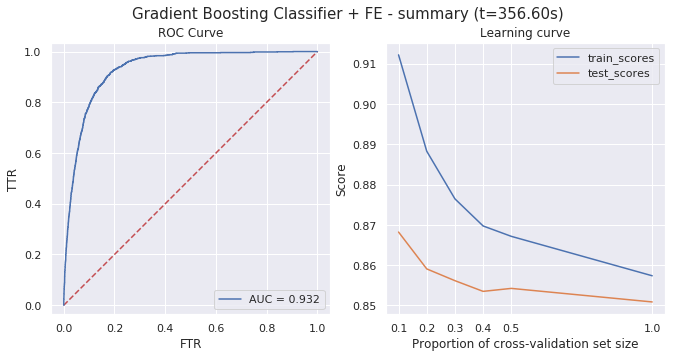

In [84]:
summary_GBC_df_ty_FE = find_and_summarize_algoritm_reduced(
                            X = X_fe, 
                            y = y_fe, 
                            estimator = GradientBoostingClassifier(),
                            param_grid = summary_GBC_dr_ty_FE[-1], 
                            estimator_name='Gradient Boosting Classifier + FE');

<a id="ch54"></a>

### 5.4. Influence of FE - Summary

In [85]:
results_FE = [
    
    summary_LRE_df_ty,
    
    summary_LRE_df_ty_FE,
    
    summary_RFC_dr_ty,
    summary_RFC_df_ty,
    
    summary_RFC_dr_ty_FE,
    summary_RFC_df_ty_FE,
    
    summary_GBC_dr_ty,
    summary_GBC_df_ty,
    
    summary_GBC_dr_ty_FE,
    summary_GBC_df_ty_FE,
    
]

results_table_FE = pd.DataFrame(list(map(pd.Series, results_FE))).drop(5, axis = 1)
results_table_FE.columns = ['classifier', 'dataset_size_pct', 'tuned', 'auc', 'score' ]
results_table_FE.dataset_size_pct = results_table_FE.dataset_size_pct.multiply(1/len(y)*100).astype('int')
results_table_FE

,classifier,dataset_size_pct,tuned,auc,score
0,Logistic Regression,100,True,0.910919,0.842874
1,LogisticRegression + FE,100,True,0.910927,0.843493
2,Random Forest Classifier,20,True,0.902165,0.870411
3,Random Forest Classifier,100,True,0.933030,0.883394
4,Random Forest Classifier + FE,20,True,0.896456,0.868200
5,Random Forest Classifier + FE,100,True,0.930226,0.886756
6,Gradient Boosting Classifier,20,True,0.912102,0.851393
7,Gradient Boosting Classifier,100,True,0.935251,0.855702
8,Gradient Boosting Classifier + FE,20,True,0.905576,0.835029
9,Gradient Boosting Classifier + FE,100,True,0.931845,0.847209


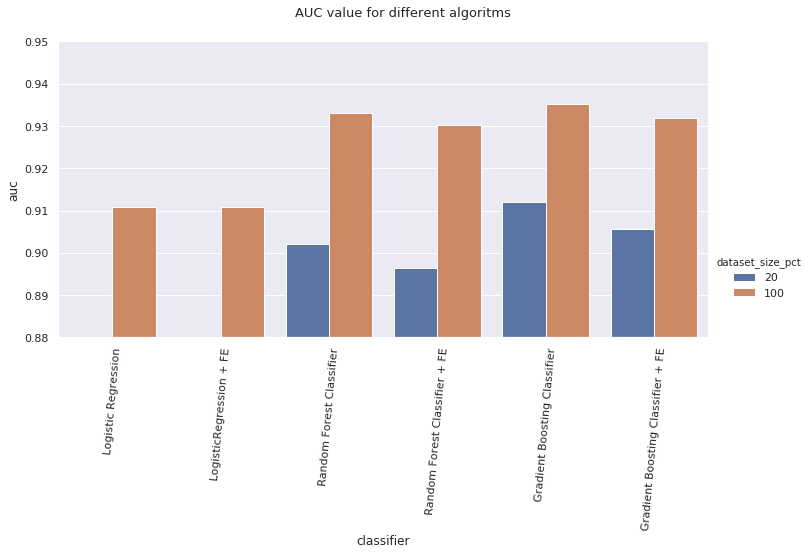

In [86]:
g = sns.catplot(x="classifier", y="auc", aspect=2,
                hue="dataset_size_pct", kind="bar", data=results_table_FE);

g.set_xticklabels(g.axes[0][0].get_xticklabels(), rotation = 85);
g.set(ylim = (0.88, 0.95))
plt.gcf().suptitle('AUC value for different algoritms', size = 13, y = 1.05);

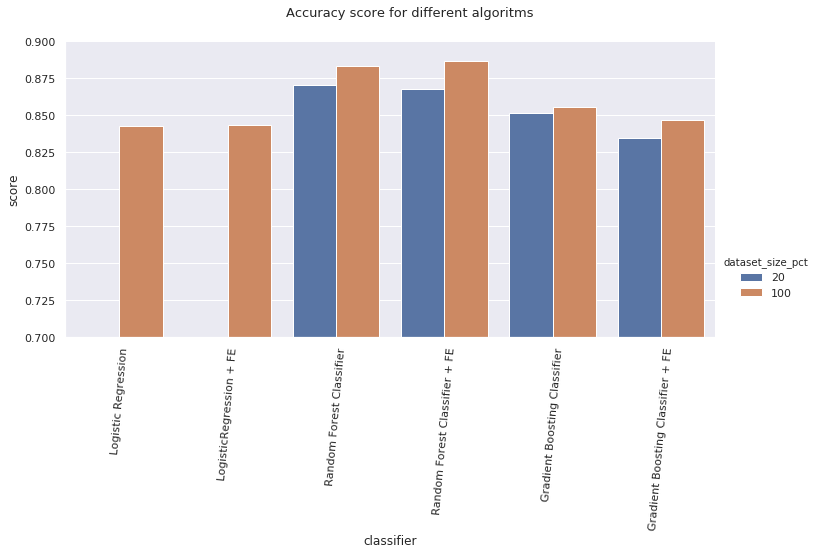

In [87]:
g = sns.catplot(x="classifier", y="score", aspect=2,
                hue="dataset_size_pct", kind="bar", data=results_table_FE);

g.set_xticklabels(g.axes[0][0].get_xticklabels(), rotation = 85);
g.set(ylim = (0.70, 0.90))
plt.gcf().suptitle('Accuracy score for different algoritms', size = 13, y = 1.05);

Our hand-made feature engineering had pretty no influence for algorithms' performance. This may
- changed features have insignificant influence for the classification result
- algoritms dealt well with this kind of data inconsistencies


<a id="ch6"></a>

# 6. Conclusions

1. In chapter 3 we applied a couple of basic Machine Learning Classifiers for the datset (45211 training examples, 16 features). Received results are surprisingly satysfying. We achieved AUC value around 0.93 and accuracy acores around 0.85. This cursory analysis confirms that there is a strong recommendation to use machine learning to solve this buissness issue. There was just a small gap between best algorithms' performance.


2. In chapter 4 we checked the reduction of number of features (51 features after encoding reduced down to 30) using Recursive Feature Elimination (RFE) and dimensionality reduction using Principal Component Analysis (PCA). All of them had small influence for the algorithms performance and time required for calculations.


3. In chapter 5 we checked the influence of spotted in chapter 1 possible feature recalculations. Our handmade changes had pretty no influence for the overall algorithms' performance.

<a id="ch61"></a>

## 6.1. Further possible steps

1. Solve imbalanced classes issue using Undersampling or SMOTE (imblearn)
2. Apply more computionally expensive algorithms (eg. Support Vector Machines for full dataset (100% of training examples) with _Stochastic Gradient Descent (SGDClassifier(loss='hinge'))_
3. Change of _GridSearchCV_ into _RandomizedSearchCV_
4. Pay more attention for hyperparameter tuning for boosting algorithms
5. Apply non-linear dimensionality reduction.
6. Train PCA and RFE on oversampled and not oversampled training set.
